# [Instacart](https://www.instacart.com/store) Grocery Basket Data Analysis: Final Report
Script by Adilya Zaripova 

<a id='top'></a>
## Table of contents  

### 1. [Data overview](#data_overview)

- [Basic information](#basic_info)
- [Descriptive statistics](#stats)  
- [Distribution overview](#distribution)   

(tags: 'overview', 'viz')

### 2. [Addressing data issues and concerns](#data_issues)

- [Missing values](#missing)
- [Outliers](#outliers)
- [Execution time and memory error](#memory) 
- [PII](#pii)

(tags: 'data-quality', 'viz')

### 3. [Data analysis and visualization](#data_analysis)

#### 1.[Orders](#orders)

- [Distribution across days of week and hours of day](#orders)
- [Order distribution by user loyalty status](#loyalty)
- [Distribution and spending range across region](#regions)

(tags: 'orders', 'viz, 'regions')

#### 2. [Products](#products)

- [Expenditure by hour of day](#expenditure)
- [Price range grouping and analysis](#price_range)
- [Product popularity](#product_popularity)
- [Department popularity](#department_popularity)

(tags: 'products', 'regions', 'viz')

#### 3. [Customers](#customers)

- [Excluding low-activity customers](#low_spending)
- [Customer profiling](#profiling)
- [Analysing customer behavior](#customer_analysis)
   - usage frequency  
   - expenditure  
   - regions  
   - product popularity  

(tags: 'customers', 'regions', 'customer-profiling', 'viz')

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

In [2]:
path=r'C:\Users\frauz\Documents\Python Projects\08-2023 Instacart Basket Analysis\02.Data'
path1=r'C:\Users\frauz\Documents\Python Projects\08-2023 Instacart Basket Analysis\04.Analysis'

In [3]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

<a id='data_overview'></a>
# 1. Data overview

<a id='basic_info'></a>
### Basic information

Data source: "The Instacart Online Grocery Shopping Dataset 2017", accessed from www.instacart.com/datasets/grocery-shopping-2017 via Kaggle.  
Customer data has been created for the purpose of this project.  
Lewel of detail in the final dataset: individual product ordered.  

[Back to top](#top)

In [4]:
# Import data

df_all=pd.read_pickle(os.path.join(path,'Prepared Data','orders_products_customers_full.pkl'))

<a id='stats'></a>
### Descriptive statistics

[Back to top](#top)

In [5]:
# Size of the dataframe: 32404859, 26

df_all.shape

(32404859, 26)

In [6]:
# Statistical overview of the dataframe

df_all.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,department_id,prices,max_order,age,n_dependants,income
count,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,30328763.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00
mean,1710745.50,25598.66,8.35,0.59,102937.23,17.14,2.74,13.43,11.10,9.92,11.98,33.05,49.47,1.50,99437.73
std,987298.83,14084.00,7.13,0.49,59466.10,17.54,2.09,4.25,8.78,6.28,495.66,25.16,18.49,1.12,43057.27
min,2.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,18.00,0.00,25903.00
25%,855947.00,13544.00,3.00,0.00,51422.00,5.00,1.00,10.00,5.00,4.00,4.20,13.00,33.00,1.00,67004.00
50%,1711049.00,25302.00,6.00,1.00,102616.00,11.00,3.00,13.00,8.00,9.00,7.40,26.00,49.00,2.00,96618.00
75%,2565499.00,37947.00,11.00,1.00,154389.00,24.00,5.00,16.00,15.00,16.00,11.30,47.00,65.00,3.00,127912.00
max,3421083.00,49688.00,145.00,1.00,206209.00,99.00,6.00,23.00,30.00,21.00,99999.00,99.00,81.00,3.00,593901.00


<a id='distribution'></a>
### Distribution overview

In order to have a good understanding of the dataframe, let's look at the distribution of the most important variables we will be using in the analysis.
- product prices  
- age  
- income  

[Back to top](#top)

In [7]:
var=df_all[['prices','age','income']].values # extracting values from the columns

scaler=preprocessing.MinMaxScaler() # scaling the data in each column
var_scaled=scaler.fit_transform(var)

df_scaled=pd.DataFrame(var_scaled) # creating a new dataframe of scaled data
df_scaled.columns=['prices','age','income' ]

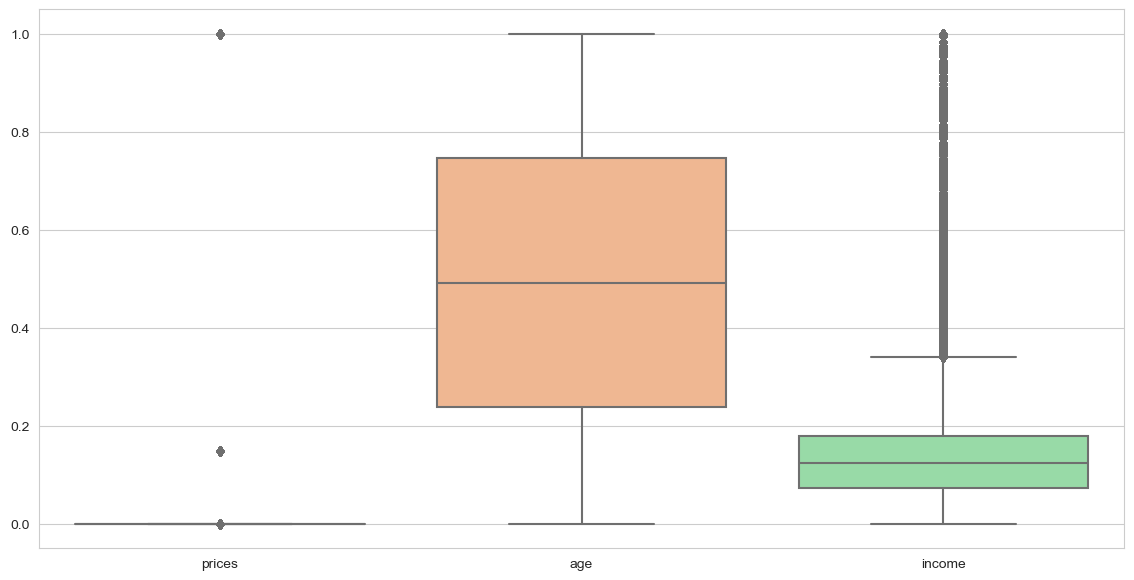

In [8]:
dist_boxplot=sns.boxplot(data=df_scaled, palette='pastel') # plotting the new dataframe 

In [9]:
dist_boxplot.figure.savefig(os.path.join(path1,'Visualizations', 'distribution_boxplot.png'))

<a id='data_issues'></a>
# 2. Addressing data issues and concerns

The final dataset was created by combining 3 data sets containing information about Instacart's orders, products, and customes. Before the data was merged, all steps of data preparation, data wrangling and consistency check, were applied to each of the data sets. In the following section I am adressing some of the issues discovered during the data prep which I believe to be important for the future analysis.  

[Back to top](#top)

<a id='missing'></a>
## Missing values

[Back to top](#top)

In [10]:
df_all.isnull().sum() # Overview of the missing values

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
order_number                    0
order_day_of_the_week           0
order_hour_of_day               0
days_since_prior_order    2076096
product_name                    0
department_id                   0
prices                          0
price_range                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
spending_range                  0
frequency_flag                  0
gender                          0
state                           0
age                             0
date_joined                     0
n_dependants                    0
fam_status                      0
income                          0
dtype: int64

#### When a user makes their first order, nothing can be recorded in days_since_prior_order, therefore the missing values can be expected in every record where order number is 1. 
#### Using pd.crosstab function, I canculate a sum of orders across every order number and days since prior order combination. This data will be extracted and submitted alongside the main report. Please review 'extracted_data.csv'.
#### Also, to make sure that the missing values appear only when order number equals 1, I conduct an additional check. 

In [11]:
# Summarising data across days since prior order and order number

missing_check=pd.crosstab(df_all['days_since_prior_order'], df_all['order_number'], dropna=False) 

missing_check.to_clipboard()

In [12]:
# Locating the records with order number 1 to make sure their number matches the number of the missing values

missing_check2=df_all[['days_since_prior_order','order_number']].loc[df_all['order_number']==1].describe()
missing_check2.to_clipboard()
missing_check2

,days_since_prior_order,order_number
count,0.0,2076096.0
mean,NaN,1.0
std,NaN,0.0
min,NaN,1.0
25%,NaN,1.0
50%,NaN,1.0
75%,NaN,1.0
max,NaN,1.0


#### I get the conclusion that the missing values are appropriate given the context and may be safely ignored.

<a id='outliers'></a>
## Outliers

#### The boxplot created in the Distribution overview part of this script demonstrated a number of outliers in prices and income columns. 
#### Prior analysis already revealed a high number of potentian outliers in the income column. However, it's been concluded that even though some values are significantly higher that an average income reported by Instacart users, these values don't look unnatural in the given context.
#### On the other hand, the outliers in the prices column do look very unusual and skew any analysis of the data. The folowing code will analyse the two products outlier prices. Information about this roducts will be extracted and submitted alongside the main report. Please review 'extracted_data.csv'. 


[Back to top](#top)

In [13]:
# Using value_counts to see the exact values

show_prices=df_all['prices'].value_counts().sort_index(ascending=False).head()
show_prices

99999.0      698
14900.0     4429
25.0       13772
24.9        5781
24.8         410
Name: prices, dtype: int64

In [14]:
# Locating the two products with unnaturally high prices

outlier_products=df_all[['product_id','product_name','prices']].loc[df_all['prices']>100].value_counts()
outlier_products.to_clipboard()
outlier_products

product_id  product_name                      prices 
21553       Lowfat 2% Milkfat Cottage Cheese  14900.0    4429
33664       2 % Reduced Fat  Milk             99999.0     698
dtype: int64

In [15]:
# Looking for similar products to compare the prices

df_all[['product_id','product_name','prices']].loc[df_all['product_name'].isin(['Cottage Cheese', 'Milk'])].value_counts()

product_id  product_name    prices
16611       Milk            7.3       1524
36339       Cottage Cheese  4.7        546
dtype: int64

#### Conclusion: The two products with unnaturally high prices will skew the results of the analysis. For the current analysis, this values will be replaced with the prices for similar products.  
For Lowfat 2% Milkfat Cottage Cheese - 4.7  
For 2 %Reduced Fat  Milk - 7.3  
#### I encourage the data owner to review and fix the prices for the future analysis.

In [16]:
# Outliers treatment

df_fixed=df_all # creating a copy of the dataframe

df_fixed['prices']=df_fixed['prices'].replace([14900,99999],[4.7,7.3]) #replacing the outliers

In [17]:
# confirming the result
    
df_fixed[['product_id','product_name','prices']].loc[df_all['product_id'].isin([21553, 33664])].value_counts()

product_id  product_name                      prices
21553       Lowfat 2% Milkfat Cottage Cheese  4.7       4429
33664       2 % Reduced Fat  Milk             7.3        698
dtype: int64

<a id='memory'></a>
## Execution time and memory error 

#### Due to the size of the dataframe, some code might take too long or could be impossible to execute. To avoid crashing the system or running into a memory error, a 30% sample of the dataframe will be created and used if necessary.

[Back to top](#top)

In [18]:
np.random.seed(5)
rand_nr=np.random.rand(len(df_fixed))>0.7
df_sample=df_fixed[rand_nr]

In [19]:
df_sample.shape

(9721931, 26)

In [20]:
len(df_fixed)/len(df_sample) # checking if the size of the sample dataframe is equal to 30% of the orifinal dataframe

3.3331710541866633

<a id='pii'></a>
## PII

#### The original customer data set contained customer names, which was the only personally identifiable information originally included in the analysis. This information was removed during the data preparation stage.

[Back to top](#top)

<a id='data_analysis'></a>
# 3. Data analysis and visualization

<a id='orders'></a>
## 1. Orders  

### Distribution across days of week and hours of day

#### This section contains analysis and visualizations of the order distribution across days of the week and hours of the day. In the previous stages of the analysis, extra columns were added to the data set to flag the busiest days of the week ('busiest_days') as well as the busiest period of the day ('busiest_period_of_day').

[Back to top](#top)

Text(0.4, 6000000, 'Saturday is the busiest day of the week')

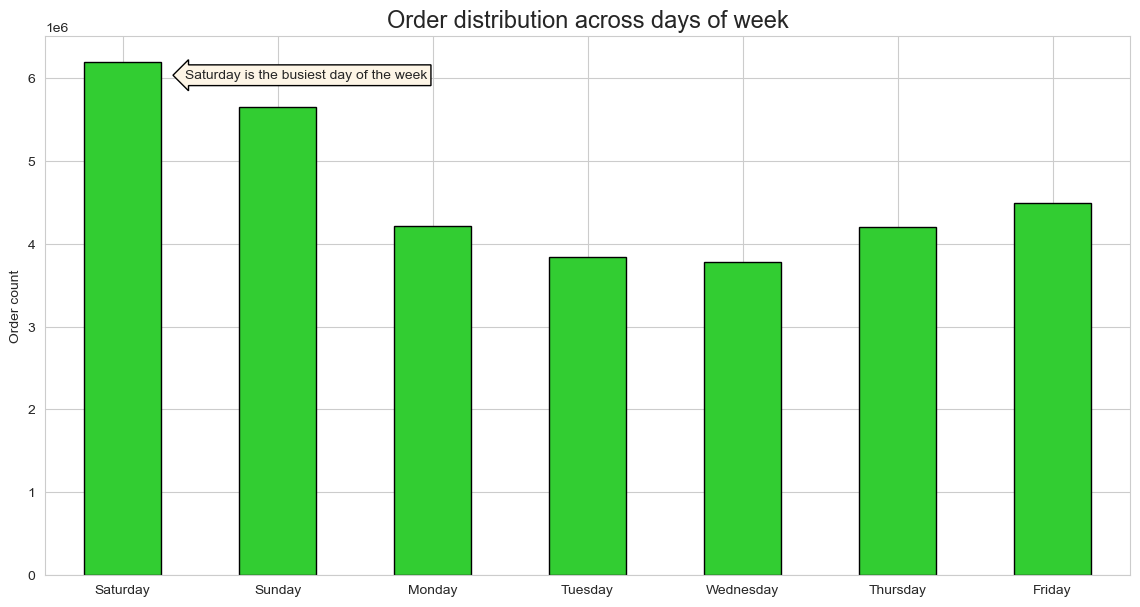

In [21]:
# Using a barchart to demonstrate order discribution across all days of the week

bar=df_fixed['order_day_of_the_week'].value_counts().sort_index().plot.bar(facecolor='limegreen', edgecolor='k')
plt.xticks(rotation=0)
plt.title('Order distribution across days of week', fontsize=17)
lables=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
bar.set_xticklabels(lables)
plt.ylabel('Order count', fontsize=10)
plt.annotate('Saturday is the busiest day of the week', xy=(0,6300000), xytext=(0.4, 6000000),bbox={'fc':'oldlace', 'ec':'k','boxstyle': "larrow,pad=0.3"})

In [22]:
# Saving the visualization

bar.figure.savefig(os.path.join(path1,'Visualizations','Order distribution by day of week.png'))

Text(0.5, 1.0, 'Order distribution by hour of day')

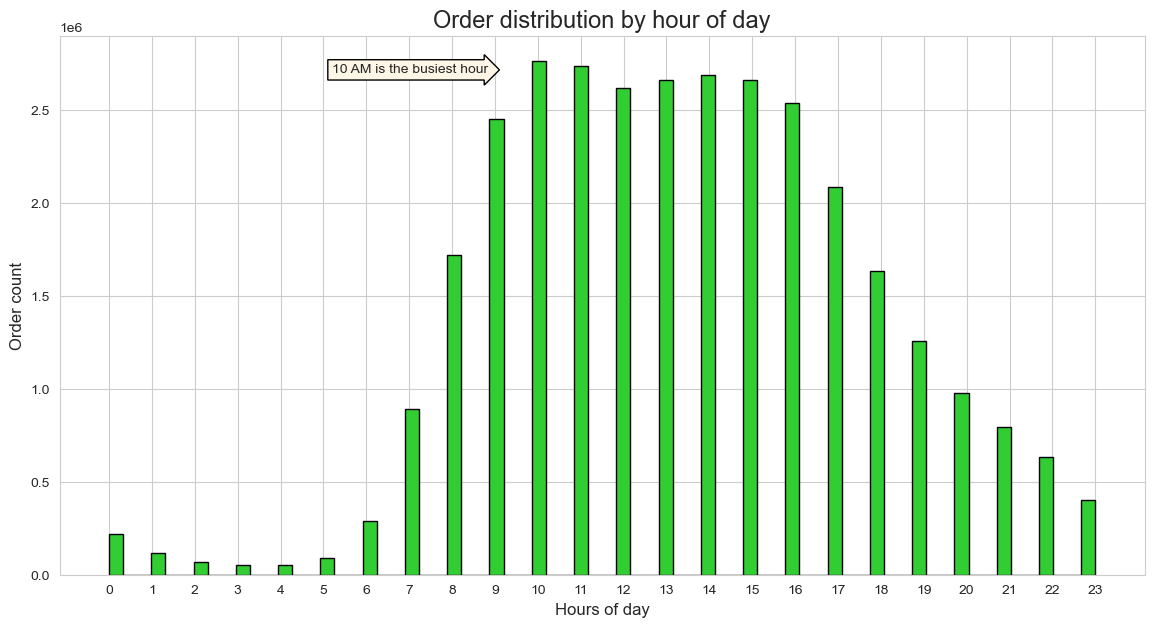

In [23]:
# Using a histogram to demonstrate order discribution across all hours of days

hist=df_fixed['order_hour_of_day'].plot.hist(bins=70, color='limegreen', edgecolor='k', align='mid')
plt.xticks(np.arange(24), fontsize=10)
plt.xlabel('Hours of day', fontsize=12)
plt.annotate('10 AM is the busiest hour', xy=(10,2761760), xytext=(5.2, 2700000),bbox={'fc':'oldlace', 'ec':'k','boxstyle': "rarrow,pad=0.3"})
plt.ylabel('Order count',fontsize=12)
plt.title('Order distribution by hour of day', fontsize=17)

#### To see if the daily order distribution is different on weekends and weekdays, I create a new variable 'week' derived from the order_day_of_the_week column with the following labels:  

Weekend (days 0 and 1)  
Weekday (days 2,3,4,5 and 6)

In [24]:
# Populating the new 'week' column

df_fixed.loc[df_fixed['order_day_of_the_week'].isin([0,1]), 'week']='Weekend'
df_fixed.loc[df_fixed['order_day_of_the_week'].isin([2,3,4,5,6]), 'week']='Weekday'

# Controling the result

df_fixed['week'].value_counts()

Weekday    20540447
Weekend    11864412
Name: week, dtype: int64

In [25]:
df_hour_dow=df_fixed[['order_hour_of_day','week']].value_counts().sort_index().reset_index(name='count')
df_hour_dow=df_hour_dow.astype({'order_hour_of_day': 'int32'})
df_hour_dow

,order_hour_of_day,week,count
0,0,Weekday,142842
1,0,Weekend,75927
2,1,Weekday,74917
3,1,Weekend,40783
4,2,Weekday,45854
5,2,Weekend,23521
6,3,Weekday,35325
7,3,Weekend,15956
8,4,Weekday,37208
9,4,Weekend,16034


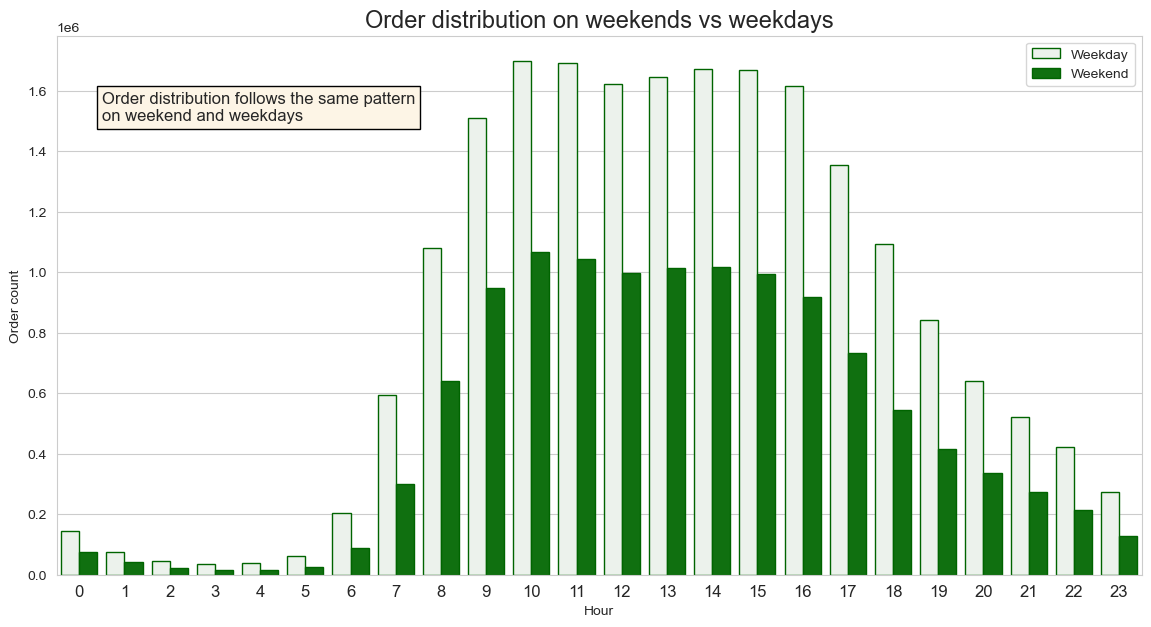

In [26]:
# Visualizing order distribution on weekends vs weekdays

plot_dow=sns.barplot(x='order_hour_of_day', y='count', data=df_hour_dow, color='green', edgecolor='darkgreen', hue='week')
plt.xticks(fontsize=12)
plt.ylabel('Order count')
plt.title('Order distribution on weekends vs weekdays', fontsize=17)
plt.xlabel('Hour')
plt.annotate('Order distribution follows the same pattern\non weekend and weekdays', xy=(0.5,1500000), xytext=(0.5,1500000), fontsize=12, bbox={'fc':'oldlace', 'ec':'k','boxstyle': "square,pad=0.3"})
plt.legend(title='')

In [27]:
hist.figure.savefig(os.path.join(path1,'Visualizations','Order distribution by hour of day.png'))
plot_dow.figure.savefig(os.path.join(path1,'Visualizations','Order distribution by hour on weekends and weekdays.png'))

<a id='loyalty'></a>
## Order distribution by user loyalty status  

New customer: up to 10 orders  
Regular customer: 10 to 40 orders  
Loyal customer: over 40 orders

[Back to top](#top)

In [28]:
df_loyalty=df_fixed['loyalty_flag'].value_counts().rename_axis('loyalty_level').reset_index(name='count')
df_loyalty

,loyalty_level,count
0,Regular customer,15876776
1,Loyal customer,10284093
2,New customer,6243990


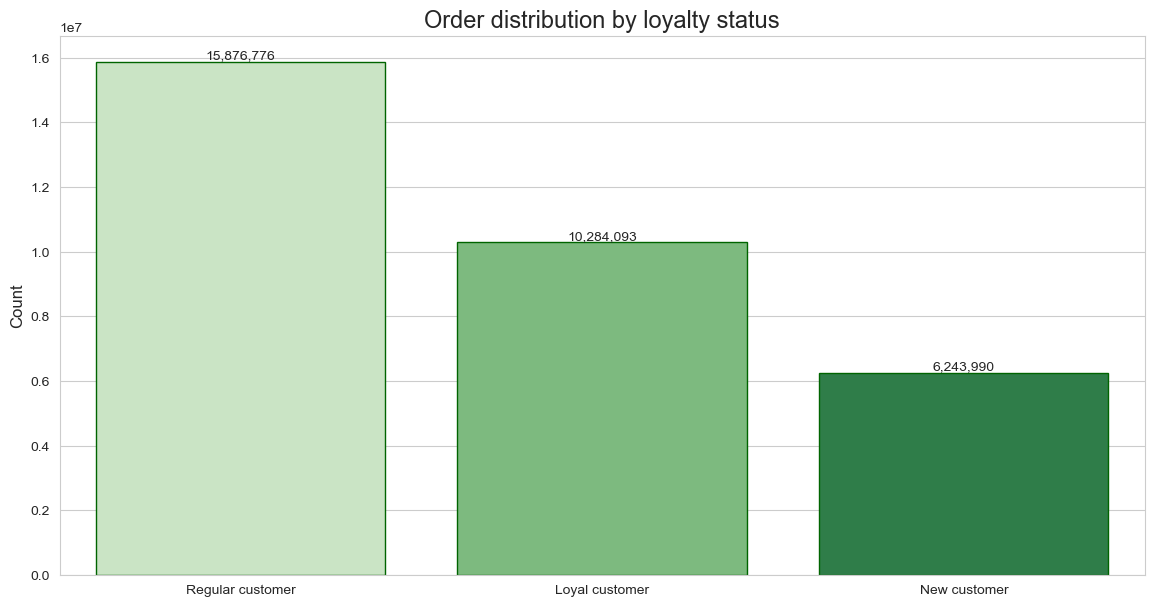

In [134]:
bar_loyal=sns.barplot(data=df_loyalty, x='loyalty_level', y='count', palette='Greens', edgecolor='darkgreen')
plt.xlabel('')
plt.ylabel('Count',fontsize=12)
plt.title('Order distribution by loyalty status', fontsize=17)

for i in bar_loyal.containers:
    bar_loyal.bar_label(i,fmt='{:,.0f}')

In [135]:
bar_loyal.figure.savefig(os.path.join(path1,'Visualizations','Orders by loyalty status.png'))

<a id='regions'></a>
## Order distribution and spending range across regions

#### The initial dataset includes details about the origin state of each user within the United States. To better examine the distribution across different geographical areas, a new column named 'region' will be generated. This column will serve to label each entry with the appropriate name of its corresponding region:   

Northeast  
Midwest  
South  
West  

[Back to top](#top)

In [31]:
# Identifying each region with a list of states that belong to it

northeast=['Maine',
           'New Hampshire',
           'Vermont',
           'Massachusetts',
           'Rhode Island',
           'Connecticut',
           'New York',
           'Pennsylvania',
           'New Jersey']
type(northeast)

list

In [32]:
midwest= ['Wisconsin',
'Michigan',
'Illinois',
'Indiana',
'Ohio',
'North Dakota',
'South Dakota',
'Nebraska',
'Kansas',
'Minnesota',
'Iowa',
'Missouri']

In [33]:
south=['Delaware',
'Maryland',
'District of Columbia',
'Virginia',
'West Virginia',
'North Carolina',
'South Carolina',
'Georgia',
'Florida',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Oklahoma',
'Texas',
'Arkansas',
'Louisiana']

In [34]:
west=['Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Alaska',
'Washington',
'Oregon',
'California',
'Hawaii']

In [35]:
# Populating region column

df_fixed.loc[df_fixed['state'].isin(northeast), 'region']='Northeast'
df_fixed.loc[df_fixed['state'].isin(midwest), 'region']='Midwest'
df_fixed.loc[df_fixed['state'].isin(south), 'region']='South'
df_fixed.loc[df_fixed['state'].isin(west), 'region']='West'

In [36]:
# Controlling the results

df_fixed[['state','region']].value_counts()

state                 region   
Pennsylvania          Northeast    667082
California            West         659783
Rhode Island          Northeast    656913
Georgia               South        656389
New Mexico            West         654494
Arizona               West         653964
North Carolina        South        651900
Oklahoma              South        651739
Alaska                West         648495
Minnesota             Midwest      647825
Massachusetts         Northeast    646358
Wyoming               West         644255
Virginia              South        641421
Missouri              Midwest      640732
Texas                 South        640394
Colorado              West         639280
Maine                 Northeast    638583
North Dakota          Midwest      638491
Alabama               South        638003
Kansas                Midwest      637538
Louisiana             South        637482
Delaware              South        637024
South Carolina        South        636754
Or

In [37]:
df_fixed['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [38]:
# Groupping the data by region and spending range

df_reg_spend=df_fixed.groupby(['region','spending_range'])['order_id'].agg('nunique').sort_values(ascending=False).rename_axis(['region','spending_range']).reset_index(name='order_count')

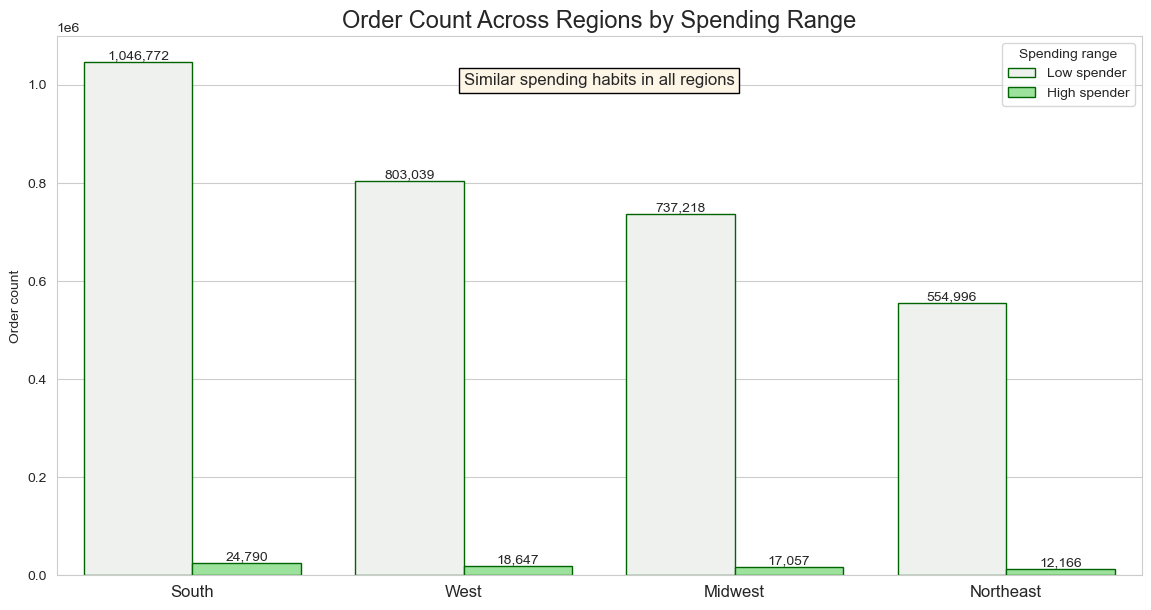

In [39]:
# Plotting the order count for each region and spending range

reg_plot=sns.barplot(x='region', y='order_count', data=df_reg_spend, color='lightgreen', edgecolor='darkgreen', hue='spending_range')
plt.xticks(fontsize=12)
plt.ylabel('Order count')
plt.title('Order Count Across Regions by Spending Range', fontsize=17)
plt.xlabel('')
plt.annotate('Similar spending habits in all regions', xy=(1,1000000), xytext=(1,1000000), fontsize=12, bbox={'fc':'oldlace', 'ec':'k','boxstyle': "square,pad=0.3"})
plt.legend(title='Spending range')

for i in reg_plot.containers:
    reg_plot.bar_label(i,fmt='{:,.0f}')

In [40]:
reg_plot.figure.savefig(os.path.join(path1,'Visualizations','Orders by region and spending.png'))

<a id='products'></a>
## 2. Products

[Back to top](#top)

<a id='expenditure'></a>
### Expenditure by hour of day

[Back to top](#top)

Text(0, 0.5, 'Prices')

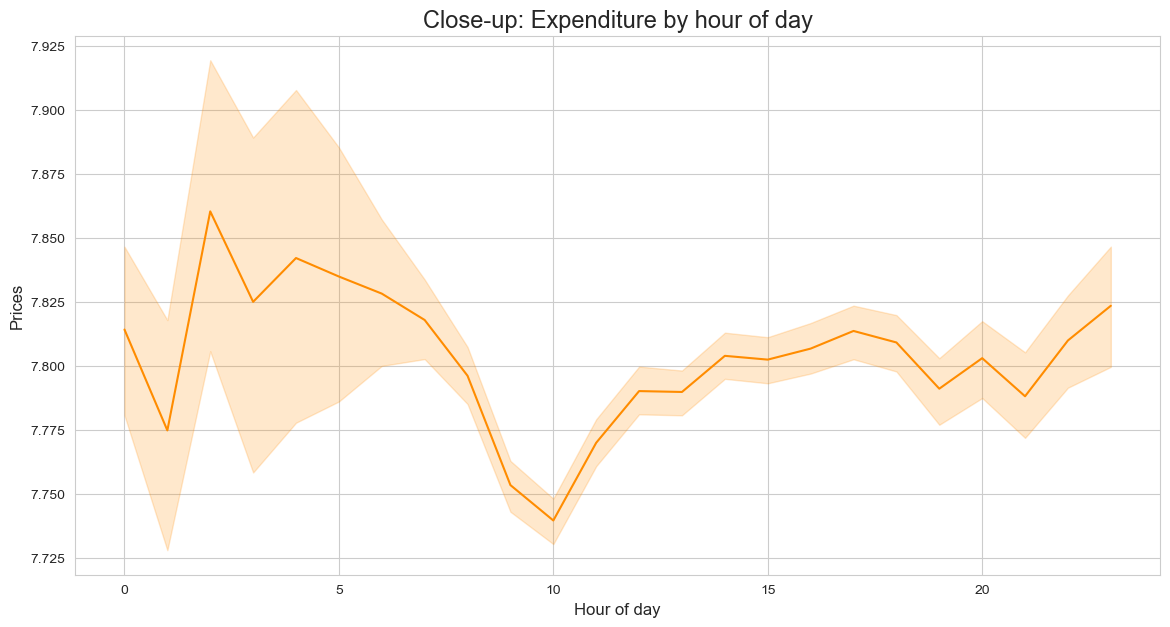

In [41]:
# Visualizing expenditure by hour of day

line_price_close=sns.lineplot(data=df_sample, x='order_hour_of_day', y='prices', color='darkorange')
plt.title('Close-up: Expenditure by hour of day', fontsize=17)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Prices', fontsize=12)

#### The lineplot shows a very close view of expenditure per hour; the difference between the lowest and highest value is only around 0.2.

(0.0, 10.0)

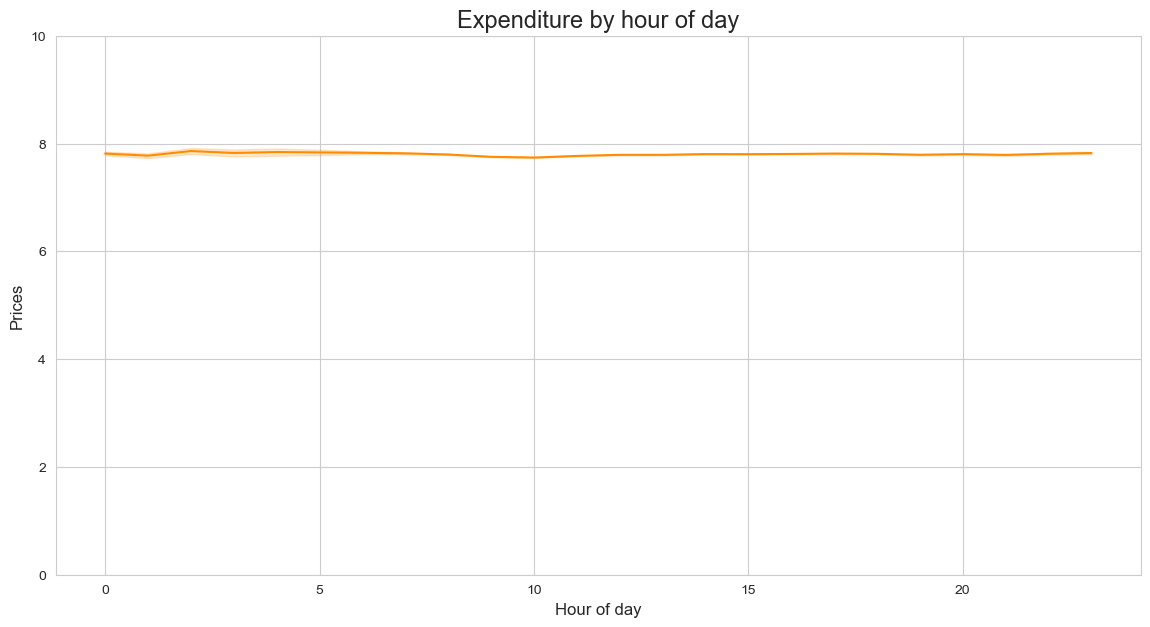

In [42]:
line_price=sns.lineplot(data=df_sample, x='order_hour_of_day', y='prices', color='darkorange')
plt.title('Expenditure by hour of day', fontsize=17)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.ylim(0,10)

#### When I fix the y-axis, the line chart confirms that the expenditure barely changes throughout the day.

In [43]:
line_price.figure.savefig(os.path.join(path1,'Visualizations','Close-up Expenditure by hour.png'))
line_price_close.figure.savefig(os.path.join(path1,'Visualizations','Expenditure by hour of day.png'))

<a id='price_range'></a>
### Price range grouping

#### Column 'price_range' has been included in the dataset to flag products by price range:  
- Low-range product: <5  
- Mid-range product: 5-15  
- High-range product: >15  

[Back to top](#top)

In [44]:
df_price_range=pd.crosstab(df_fixed['region'],df_fixed['price_range']).sort_values('Mid-range product', ascending=False)

df_price_range

price_range,High-range product,Low-range product,Mid-range product
region,,,
South,139390,3368338,7284157
West,107168,2592736,5593009
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591


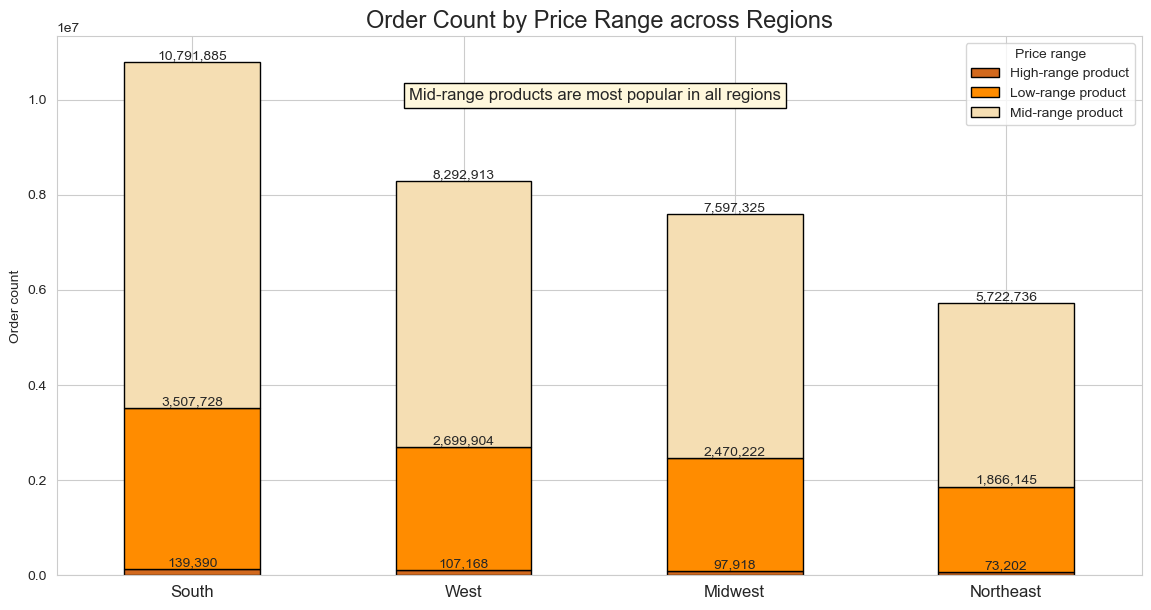

In [45]:
# Visualizing order count across different price ranges and spending ranges

price_plot=df_price_range.plot(kind='bar', stacked=True, color=['chocolate','darkorange','wheat'], edgecolor='k')
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Order count')
plt.title('Order Count by Price Range across Regions', fontsize=17)
plt.annotate('Mid-range products are most popular in all regions', xy=(0.8,10000000), xytext=(0.8,10000000), fontsize=12, bbox={'fc':'cornsilk', 'ec':'k','boxstyle': "square,pad=0.3"})
plt.xlabel('')
plt.legend(title='Price range')

for i in price_plot.containers:
    price_plot.bar_label(i,fmt='{:,.0f}')


In [46]:
price_plot.figure.savefig(os.path.join(path1,'Visualizations','Order Count by Price Range across Regions'))

<a id='product_popularity'></a>
## Product popularity

#### Top 10 most products by order count.

[Back to top](#top)

In [47]:
# Grouping the data by products and isolating the top 10 products with the highest order count

df_top=df_fixed.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(10).rename_axis('name').reset_index(name='order_count')

In [48]:
df_top

,name,order_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


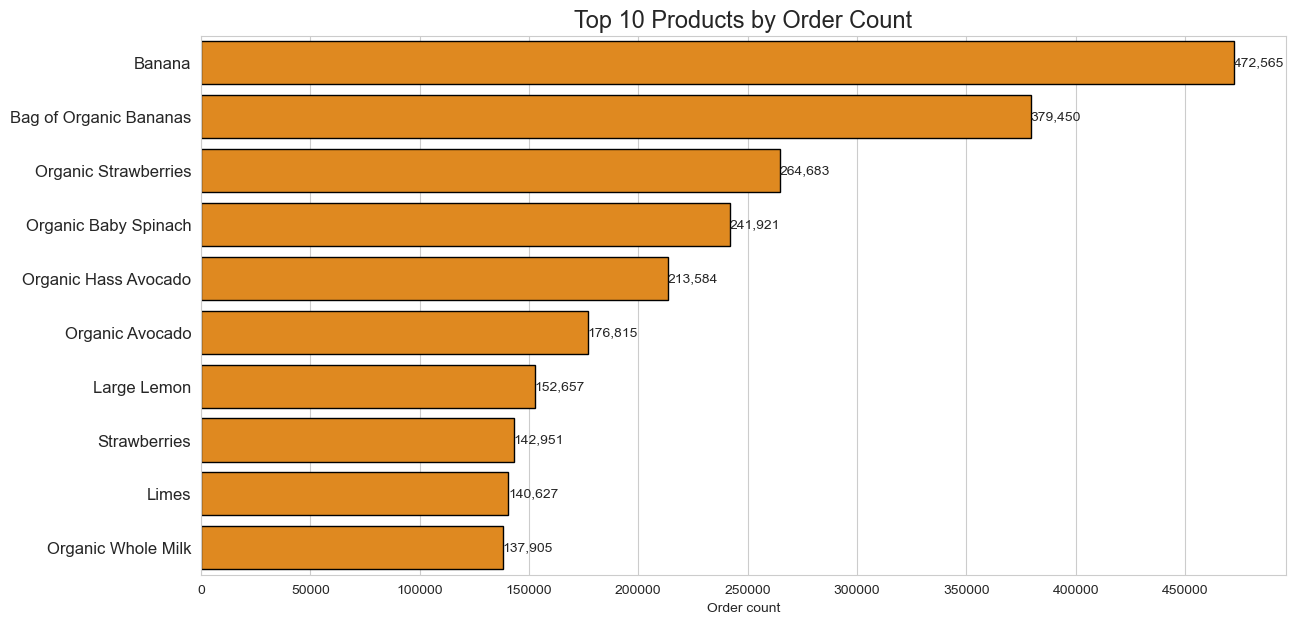

In [51]:
barh=sns.barplot(x='order_count', y='name', data=df_top, color='darkorange',edgecolor='k')
plt.xticks(range(0,500000,50000), fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Order count')
plt.ylabel('')
plt.title('Top 10 Products by Order Count', fontsize=17)

for i in barh.containers:
    barh.bar_label(i,fmt='{:,.0f}')


In [52]:
barh.figure.savefig(os.path.join(path1,'Visualizations','Top 10 Products.png'))

<a id='department_popularity'></a>
## Departments popularity

#### Department names are stored in a separate data set. In order to create a new 'department_name' column,  the new data will be turned into a dictionary and used to populate the column.

[Back to top](#top)

In [53]:
# Importing the new data set 

df_dep=pd.read_csv(os.path.join(path,'Prepared Data', 'departments_wrangled.csv'), index_col=False)
df_dep.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
# Populating the new department_name column using .map function and a dictionary

df_fixed['department_name']=df_fixed['department_id'].map(df_dep.set_index('department_id')['department'].to_dict())

In [55]:
# Confirming the result

df_fixed[['department_id','department_name']].head(10)

,department_id,department_name
0,16,dairy eggs
1,16,dairy eggs
2,16,dairy eggs
3,16,dairy eggs
4,16,dairy eggs
5,4,produce
6,4,produce
7,4,produce
8,4,produce
9,4,produce


In [56]:
# Grouping the records by department name to see the order count for each group

df_depart=df_fixed.groupby(['department_name'])['order_id'].agg('nunique').sort_values(ascending=False).rename_axis('department').reset_index(name='order_count')

In [57]:
df_depart

,department,order_count
0,produce,2409320
1,dairy eggs,2174815
2,beverages,1456999
3,snacks,1391447
4,frozen,1180461
5,pantry,1117763
6,bakery,878658
7,deli,770300
8,canned goods,681305
9,dry goods pasta,597862


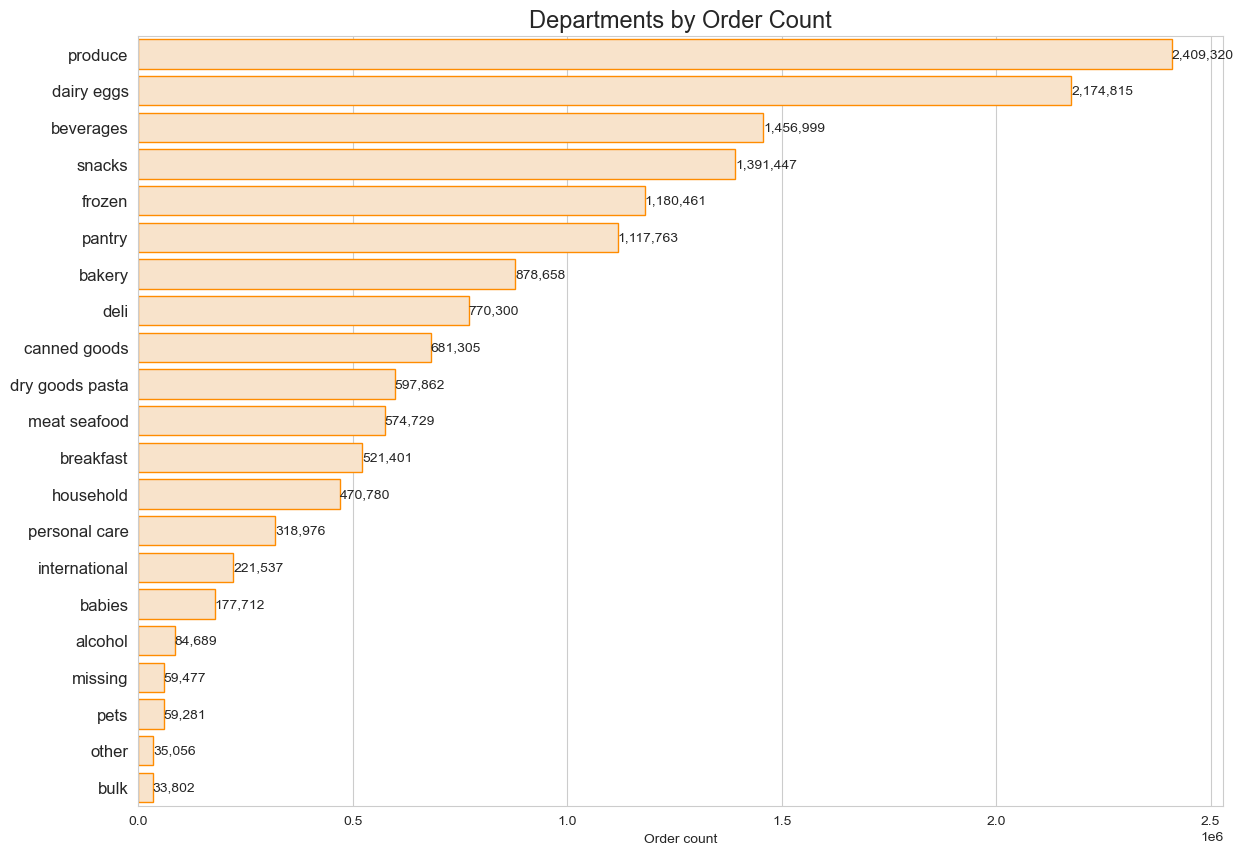

In [58]:
# Plotting order count by department

plt.figure(figsize=(14,10))
bar_dep=sns.barplot(x='order_count', y='department', data=df_depart, color='bisque',edgecolor='darkorange')
plt.yticks(fontsize=12)
plt.xlabel('Order count')
plt.ylabel('')
plt.title('Departments by Order Count', fontsize=17)

for i in bar_dep.containers:
    bar_dep.bar_label(i,fmt='{:,.0f}')

In [59]:
# Comparing department popularity across regions

df_reg_dep=df_fixed.groupby('region')[['department_name']].value_counts().sort_values(ascending=False).reset_index(name='count')
df_reg_dep

,region,department_name,count
0,South,produce,3160551
1,West,produce,2424964
2,Midwest,produce,2227937
3,South,dairy eggs,1796969
4,Northeast,produce,1665839
...,...,...,...
79,West,bulk,9045
80,Midwest,other,8420
81,Midwest,bulk,8193
82,Northeast,other,6585


C:\Users\frauz\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


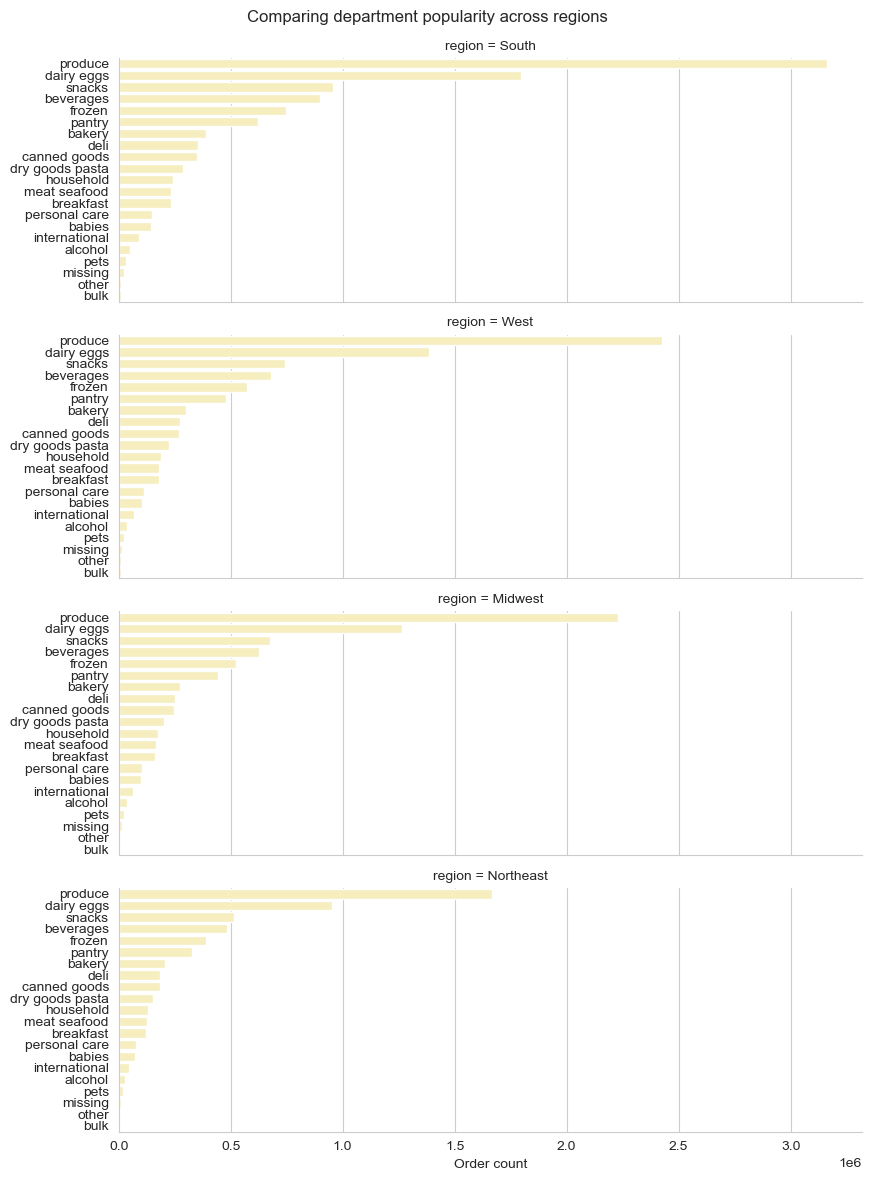

In [60]:
sns.set_palette('YlOrBr')
grid_reg=sns.FacetGrid(df_reg_dep,
                   row='region',
                   height=3,
                   aspect=3)
plot=grid_reg.map(sns.barplot, 'count', 'department_name')
grid_reg.fig.subplots_adjust(top=0.94)
grid_reg.fig.suptitle('Comparing department popularity across regions')
grid_reg.set_axis_labels("Order count", "")

In [61]:
bar_dep.figure.savefig(os.path.join(path1,'Visualizations','Department popularity.png'))
grid_reg.savefig(os.path.join(path1,'Visualizations','Department popularity by region.png'))

<a id='customers'></a>
## Customers

[Back to top](#top)

<a id='low_spending'></a>
## Excluding low-activity customers

Inline with a request from Instacart CFO, customers who have less than 5 orders will be removed from the dataframe and exported as 'under_five_orders.csv'.

[Back to top](#top)

In [62]:
# Creating a subset of data with low spending users

df_removed=df_fixed[df_fixed['max_order']<5]

# Confirming the result

df_removed['max_order'].value_counts()

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [63]:
df_removed.to_csv(os.path.join(path,'Prepared Data','under_five_orders.csv'))

In [64]:
# Removing the IDs of low spending users from the dataframe

df_clean=df_fixed
df_clean.loc[df_clean['max_order']<5]=np.nan

df_clean['user_id'].isnull().sum()

1440295

In [65]:
df_clean.shape

(32404859, 29)

In [66]:
# Removing the 1440295 records with missing user IDs

df_final=df_clean.dropna(subset=['user_id'])
df_final.shape

(30964564, 29)

#### The new dataframe contains 30964564 rows and 28 columns

<a id='profiling'></a>
## Customer Segmentation and Profiling

In alignment with directives from the marketing and business strategy divisions, several new columns will be added to the data to enable grouping and profiling the users based on the following variables: 

###### 'profile' (Household categories for which the user is purchasing groceries):  
1) One-person household (single, divorced/widowed, or living with parents and siblings person with no dependants)
2) Single parent (single, divorced/widowed, or living with parents person with one or more dependants)
3) Family (married person with a maximum of one dependant)
4) Big family (married person with two and more dependants)

I chose against creating a large number user profiles because it will clutter visualizations and make them hard to understand. In order to analyse every profile in more details, the following columns will be created to enable grouping and analysis of users based on:

###### 'age_categories' :
1) Youthful (18-30 years) 
2) Adult (30-60 years) 
3) Senior (over 60 years)  

###### 'income_brackets': 
1) Lower income (<70000) 
2) Regular income (70000-200000) 
3) High income (>200000) 

(Note: These groupings are predicated on the data distribution within the current dataframe and do not correlate with income classifications specified by the World Bank or other financial institutions.)  

###### 'weekday_engagement': 
1) Active on weekends (most of orders were placed during weekend - days 0 and 1)
2) Active on weekdays (most of orders were placed during weekdays - days 2-6) 

###### 'time_day_engagement': 
1) During business hours (most of orders were recorded between 8 AM and 5 PM, aligning with typical business hours.)
2) Beyond business hours (most of orders were recorded between 12 AM and 7 AM, as well as between 6 PM and 11 PM, which fall outside conventional business hours)


###### AZ: I would like to draw your attention to several observations regarding the customer data. I advise the data owner to undertake a comprehensive audit of the records to ensure the accuracy of data. Please review the sheet 8. 'Bonus: User Data Concerns'' in "Instacart_Data_Analysis_Final_Report_Adilya_Zaripova.xlsx" for more details.

[Back to top](#top)

### Customer Profiling


In [67]:
# Populating 'profile' column basen on values in 'fam_status' and 'n_dependants' 

df_final.loc[(df_final['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_final['n_dependants']==0.0), 'profile']='One-person household'

df_final.loc[(df_final['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_final['n_dependants']>0.0), 'profile']='Single parent'

df_final.loc[(df_final['fam_status']=='married') & (df_final['n_dependants']<2.0), 'profile']='Family'

df_final.loc[(df_final['fam_status']=='married') & (df_final['n_dependants']>1.0), 'profile']='Big family'

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\2989055500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[(df_final['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_final['n_dependants']==0.0), 'profile']='One-person household'


In [68]:
# Controlling the results

df_final[['fam_status','n_dependants','profile']].value_counts()

fam_status                        n_dependants  profile             
married                           3.0           Big family              7284047
                                  2.0           Big family              7248603
                                  1.0           Family                  7211061
single                            0.0           One-person household    5094410
divorced/widowed                  0.0           One-person household    2645271
living with parents and siblings  1.0           Single parent            508045
                                  3.0           Single parent            488469
                                  2.0           Single parent            484658
dtype: int64

In [69]:
df_final['profile'].value_counts()

Big family              14532650
One-person household     7739681
Family                   7211061
Single parent            1481172
Name: profile, dtype: int64

In [70]:
# Populating 'age_categories' column using values in 'age'

df_final.loc[(df_final['age']<=30.0), 'age_category']='Youthful'

df_final.loc[(df_final['age']>60.0), 'age_category']='Senior'

df_final.loc[(df_final['age']>30.0)&(df_final['age']<=60.0), 'age_category']='Adult'

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\3208046175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[(df_final['age']<=30.0), 'age_category']='Youthful'


In [71]:
# Controlling the results

df_final[['age','age_category']].value_counts()

age   age_category
79.0  Senior          508337
49.0  Adult           507879
48.0  Adult           506730
31.0  Adult           506218
64.0  Senior          504832
                       ...  
60.0  Adult           461897
36.0  Adult           460649
66.0  Senior          454604
41.0  Adult           451269
25.0  Youthful        449324
Length: 64, dtype: int64

In [72]:
df_final[['age_category']].value_counts()

age_category
Adult           14547717
Senior          10112607
Youthful         6304240
dtype: int64

In [73]:
# Populating 'income_brackets' column using value in 'income'

df_final.loc[(df_final['income']<=70000.0), 'income_brackets']='Lower income'

df_final.loc[(df_final['income']>70000.0)&(df_final['income']<=200000.0), 'income_brackets']='Regular income'

df_final.loc[(df_final['income']>200000.0), 'income_brackets']='High income'

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\2349873591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[(df_final['income']<=70000.0), 'income_brackets']='Lower income'


In [74]:
# Controlling the results

df_final[['income_brackets']].value_counts()

income_brackets
Regular income     22189707
Lower income        8520715
High income          254142
dtype: int64

In [75]:
# Calculating the mode value in order_day_of_the_week for each user

df_final['mode_day']=df_final.groupby('user_id')['order_day_of_the_week'].transform(lambda x: x.mode().iloc[0])

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\1958664563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['mode_day']=df_final.groupby('user_id')['order_day_of_the_week'].transform(lambda x: x.mode().iloc[0])


In [76]:
# Controlling the result

df_final[['user_id','order_day_of_the_week','mode_day']][df_final['user_id']==4]

,user_id,order_day_of_the_week,mode_day
23185044,4.0,5.0,4.0
23185045,4.0,4.0,4.0
23185046,4.0,6.0,4.0
23185047,4.0,4.0,4.0
23185048,4.0,5.0,4.0
23185049,4.0,6.0,4.0
23185050,4.0,6.0,4.0
23185051,4.0,4.0,4.0
23185052,4.0,4.0,4.0
23185053,4.0,4.0,4.0


In [77]:
# Populating the 'weekday_engagement' column using the values in 'mode_day'

df_final.loc[(df_final['mode_day'].isin([0.0,1.0])), 'weekday_engagement']='Active on weekends'

df_final.loc[(~df_final['mode_day'].isin([0.0,1.0])), 'weekday_engagement']='Active on weekdays'

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\3368561024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[(df_final['mode_day'].isin([0.0,1.0])), 'weekday_engagement']='Active on weekends'


In [78]:
# Controlling the result

df_final[['mode_day','weekday_engagement']].value_counts()

mode_day  weekday_engagement
0.0       Active on weekends    8203367
1.0       Active on weekends    6637752
6.0       Active on weekdays    4347397
5.0       Active on weekdays    3461208
2.0       Active on weekdays    3127061
3.0       Active on weekdays    2631483
4.0       Active on weekdays    2556296
dtype: int64

In [79]:
df_final['weekday_engagement'].value_counts()

Active on weekdays    16123445
Active on weekends    14841119
Name: weekday_engagement, dtype: int64

In [80]:
# Calculating the mode value in order_day_of_the_week for each user

df_final['mode_hour']=df_final.groupby('user_id')['order_hour_of_day'].transform(lambda x: x.mode().iloc[0])

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\3592687347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['mode_hour']=df_final.groupby('user_id')['order_hour_of_day'].transform(lambda x: x.mode().iloc[0])


In [81]:
# Controlling the result

df_final[['user_id','order_hour_of_day','mode_hour']][df_final['user_id']==4]

,user_id,order_hour_of_day,mode_hour
23185044,4.0,13.0,15.0
23185045,4.0,15.0,15.0
23185046,4.0,11.0,15.0
23185047,4.0,15.0,15.0
23185048,4.0,13.0,15.0
23185049,4.0,11.0,15.0
23185050,4.0,11.0,15.0
23185051,4.0,15.0,15.0
23185052,4.0,15.0,15.0
23185053,4.0,15.0,15.0


In [82]:
# Populating the 'time_day_engagement' column using the values in 'mode_hour'

df_final.loc[(df_final['mode_hour']>=8)&(df_final['mode_hour']<=17), 'time_day_engagement']='During business hours'

df_final.loc[(df_final['mode_hour'].isin([18,19,20,21,22,23,0,1,2,3,4,5,6,7])), 'time_day_engagement']='Beyond business hours'

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\833590075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[(df_final['mode_hour']>=8)&(df_final['mode_hour']<=17), 'time_day_engagement']='During business hours'


In [83]:
# Controlling the result

df_final[['mode_hour','time_day_engagement']].value_counts()

mode_hour  time_day_engagement  
10.0       During business hours    3236481
9.0        During business hours    2934912
11.0       During business hours    2850808
14.0       During business hours    2646808
15.0       During business hours    2627537
16.0       During business hours    2596753
13.0       During business hours    2544891
12.0       During business hours    2469504
17.0       During business hours    1901228
8.0        During business hours    1826818
18.0       Beyond business hours    1358882
19.0       Beyond business hours     893167
7.0        Beyond business hours     783219
20.0       Beyond business hours     627717
21.0       Beyond business hours     590271
22.0       Beyond business hours     429080
23.0       Beyond business hours     229320
6.0        Beyond business hours     158967
0.0        Beyond business hours     112812
1.0        Beyond business hours      52157
2.0        Beyond business hours      28815
5.0        Beyond business hours      25964

In [84]:
df_final['time_day_engagement'].value_counts()

During business hours    25635740
Beyond business hours     5328824
Name: time_day_engagement, dtype: int64

<a id='customer_analysis'></a>
## Analysing Customer Behavior

[Back to top](#top)

In [85]:
# Visualizing the distribution of orders across profiles

df_profiles=df_final[['profile','gender']].value_counts().reset_index(name='count') # grouping and counting orders


In [86]:
df_profiles

,profile,gender,count
0,Big family,Male,7302761
1,Big family,Female,7229889
2,One-person household,Male,3881398
3,One-person household,Female,3858283
4,Family,Male,3644985
5,Family,Female,3566076
6,Single parent,Male,757596
7,Single parent,Female,723576


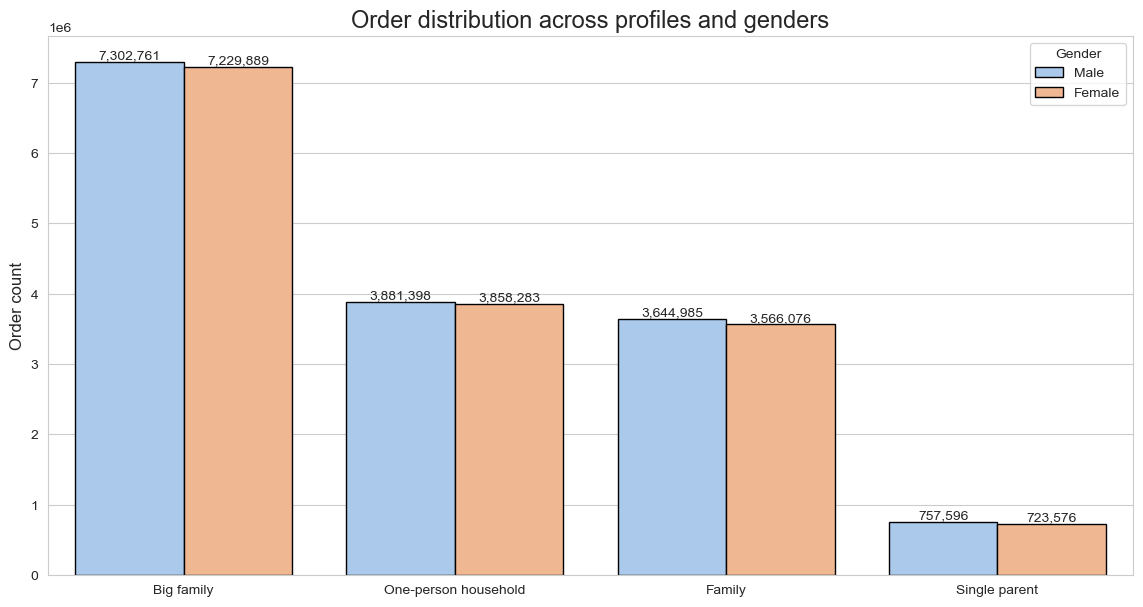

In [87]:
sns.set_palette('pastel')
bar_profile=sns.barplot(data=df_profiles, x='profile', y='count', hue='gender', edgecolor='k')
plt.xlabel('')
plt.ylabel('Order count', fontsize=12)
plt.title('Order distribution across profiles and genders', fontsize=17)
plt.legend(title='Gender')


for i in bar_profile.containers:
    bar_profile.bar_label(i,fmt='{:,.0f}')

In [88]:
bar_profile.figure.savefig(os.path.join(path1,'Visualizations','Profile distribution.png'))

#### Among Instacart orders, the predominant portion is contributed by parents within larger families (2 and more dependants). Notably, the distribution across genders is remarkably even. 

In [89]:
# Creating subsets of data for each of the main profiling groups (type of household)

df_one=df_final[df_final['profile']=='One-person household']

df_single=df_final[df_final['profile']=='Single parent']

df_fam=df_final[df_final['profile']=='Family']

df_bfam=df_final[df_final['profile']=='Big family']

# Controlling the result

len(df_one)+len(df_single)+len(df_fam)+len(df_bfam)

30964564

### Further analysis of each profile

#### 1. Big family

In [90]:
# Analysing the distribution of orders by age within the big family profile

df_bfam_age=df_bfam[['age_category']].value_counts().reset_index(name='count')
df_bfam_age

,age_category,count
0,Adult,7246438
1,Senior,5103479
2,Youthful,2182733


Text(0.5, 1.0, 'Age of Big Family users')

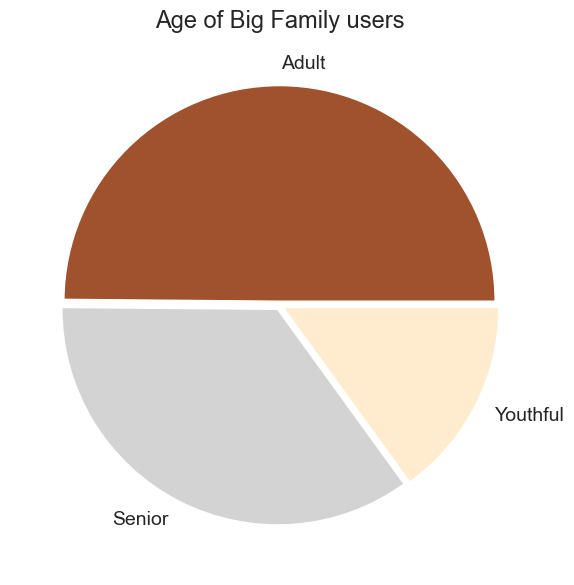

In [91]:
pie_chart_exploded = (0.02, 0.02, 0.02)
pie_bfam_age=plt.pie(df_bfam_age['count'],
                     explode=pie_chart_exploded,
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=df_bfam_age['age_category'],
                     textprops={'fontsize': 14})

plt.title('Age of Big Family users', fontsize=17)

In [92]:
# Analysing the distribution of orders by income within the big family profile

df_bfam_income=df_bfam[['income_brackets']].value_counts().reset_index(name='count')
df_bfam_income

,income_brackets,count
0,Regular income,10632244
1,Lower income,3773144
2,High income,127262


Text(0.5, 1.0, 'Income of Big Family users')

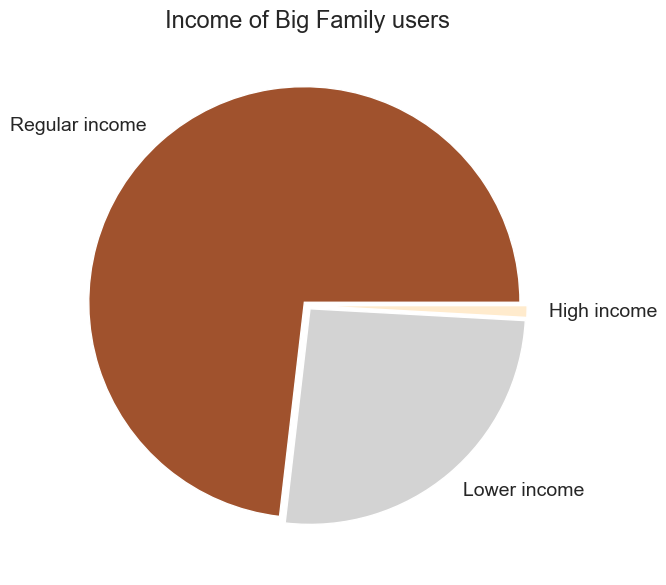

In [93]:
pie_bfam_income=plt.pie(df_bfam_income['count'],
                        explode=pie_chart_exploded, 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_bfam_income['income_brackets'], 
                        textprops={'fontsize': 14})

plt.title('Income of Big Family users', fontsize=17)

In [94]:
# Analysing the distribution of orders by weekday engagement within the big family profile

df_bfam_weekday=df_bfam[['weekday_engagement']].value_counts().reset_index(name='count')
df_bfam_weekday

,weekday_engagement,count
0,Active on weekdays,7608608
1,Active on weekends,6924042


Text(0.5, 1.0, 'Weekday engagement of Big Family users')

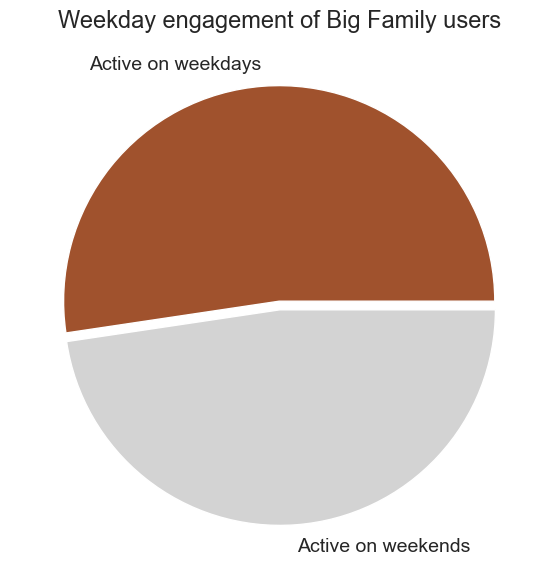

In [95]:
pie_bfam_weekday=plt.pie(df_bfam_weekday['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_bfam_weekday['weekday_engagement'], 
                        textprops={'fontsize': 14})

plt.title('Weekday engagement of Big Family users', fontsize=17)

In [96]:
# Analysing the distribution of orders by time of day engagement within the big family profile

df_bfam_hour=df_bfam[['time_day_engagement']].value_counts().reset_index(name='count')
df_bfam_hour

,time_day_engagement,count
0,During business hours,12025087
1,Beyond business hours,2507563


Text(0.5, 1.0, 'Time of day engagement of Big Family users')

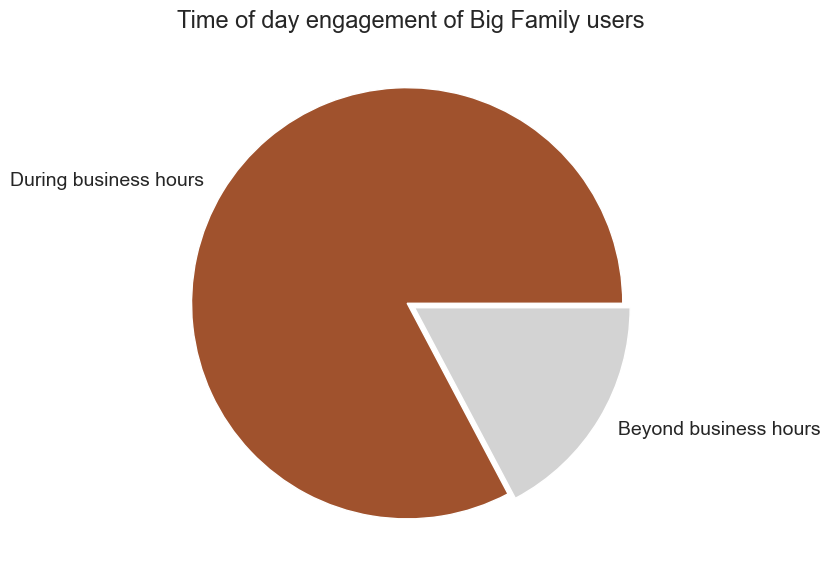

In [97]:
pie_bfam_hour=plt.pie(df_bfam_hour['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_bfam_hour['time_day_engagement'], 
                        textprops={'fontsize': 14})

plt.title('Time of day engagement of Big Family users', fontsize=17)

#### 2. One-person household

In [98]:
# Analysing the distribution of orders by age within the one-person household profile

df_one_age=df_one[['age_category']].value_counts().reset_index(name='count')
df_one_age

,age_category,count
0,Adult,3633208
1,Senior,2533101
2,Youthful,1573372


Text(0.5, 1.0, 'Age of One-person household users')

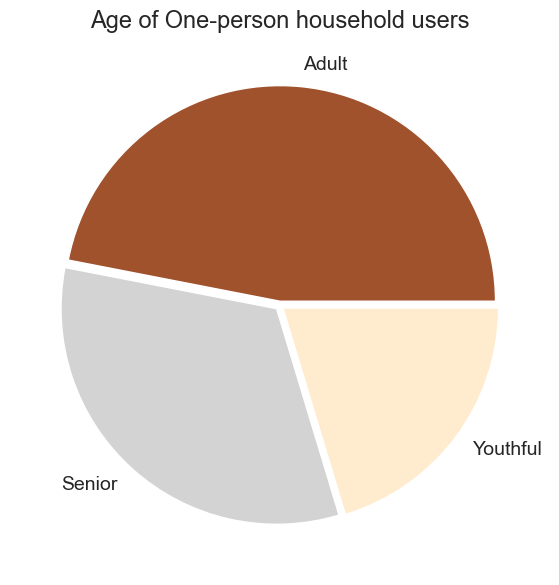

In [99]:
pie_one_age=plt.pie(df_one_age['count'],
                     explode=pie_chart_exploded,
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=df_one_age['age_category'],
                     textprops={'fontsize': 14})

plt.title('Age of One-person household users', fontsize=17)

In [100]:
# Analysing the distribution of orders by income within the one-person household profile

df_one_income=df_one[['income_brackets']].value_counts().reset_index(name='count')
df_one_income

,income_brackets,count
0,Regular income,5543111
1,Lower income,2131964
2,High income,64606


Text(0.5, 1.0, 'Income of One-person household users')

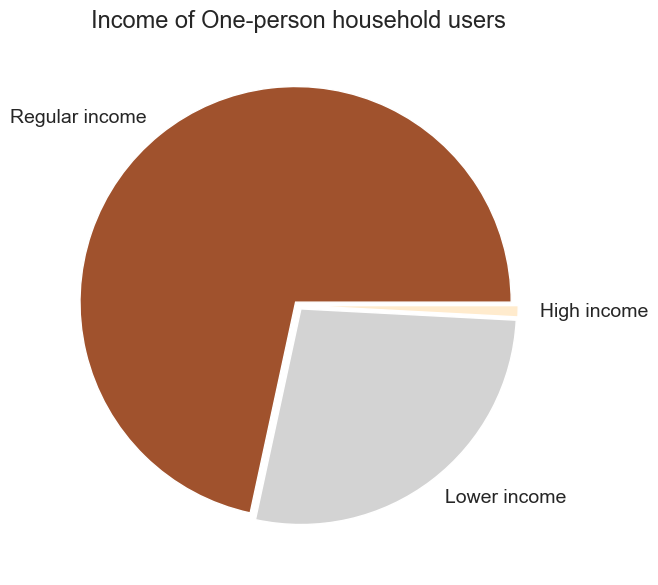

In [101]:
pie_one_age=plt.pie(df_one_income['count'],
                     explode=pie_chart_exploded,
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=df_one_income['income_brackets'],
                     textprops={'fontsize': 14})

plt.title('Income of One-person household users', fontsize=17)

In [102]:
# Analysing the distribution of orders by weekday engagement within the one-person household profile

df_one_weekday=df_one[['weekday_engagement']].value_counts().reset_index(name='count')
df_one_weekday

,weekday_engagement,count
0,Active on weekdays,3971861
1,Active on weekends,3767820


Text(0.5, 1.0, 'Weekday engagement of One-person household users')

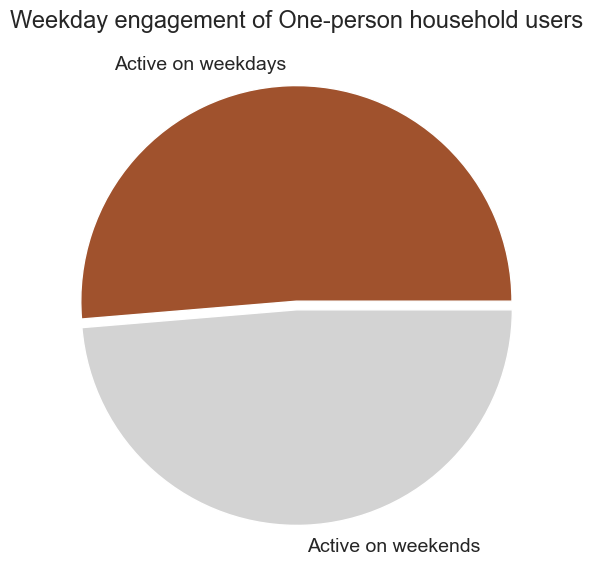

In [103]:
pie_one_weekday=plt.pie(df_one_weekday['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_one_weekday['weekday_engagement'], 
                        textprops={'fontsize': 14})

plt.title('Weekday engagement of One-person household users', fontsize=17)

In [104]:
# Analysing the distribution of orders by time of day engagement within the one-person household profile

df_one_hour=df_one['time_day_engagement'].value_counts().reset_index(name='count')
df_one_hour

,index,count
0,During business hours,6395592
1,Beyond business hours,1344089


Text(0.5, 1.0, 'Time of day engagement of One-person household users')

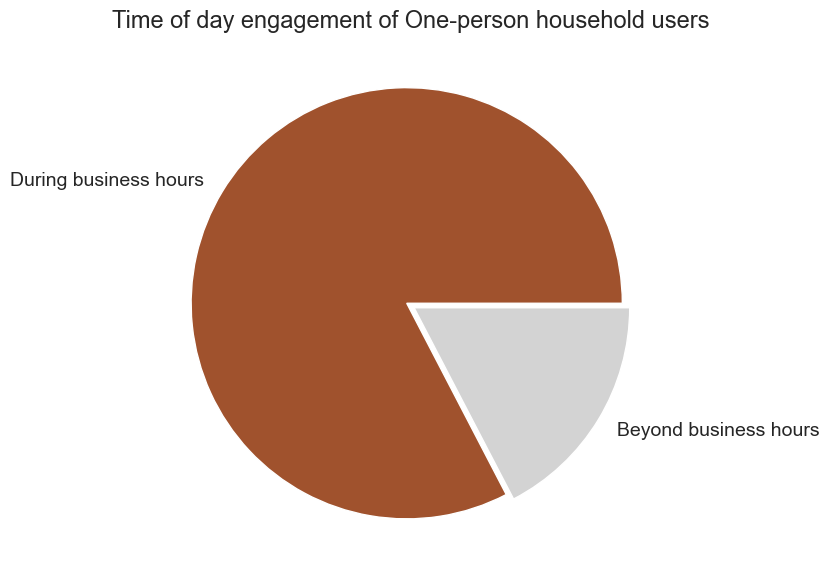

In [105]:
pie_one_hour=plt.pie(df_one_hour['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_one_hour['index'], 
                        textprops={'fontsize': 14})

plt.title('Time of day engagement of One-person household users', fontsize=17)

#### 3. Family 

In [106]:
# Analysing the distribution of orders by age within the family profile

df_fam_age=df_fam[['age_category']].value_counts().reset_index(name='count')
df_fam_age

,age_category,count
0,Adult,3668071
1,Senior,2476027
2,Youthful,1066963


Text(0.5, 1.0, 'Age of Family Profile users')

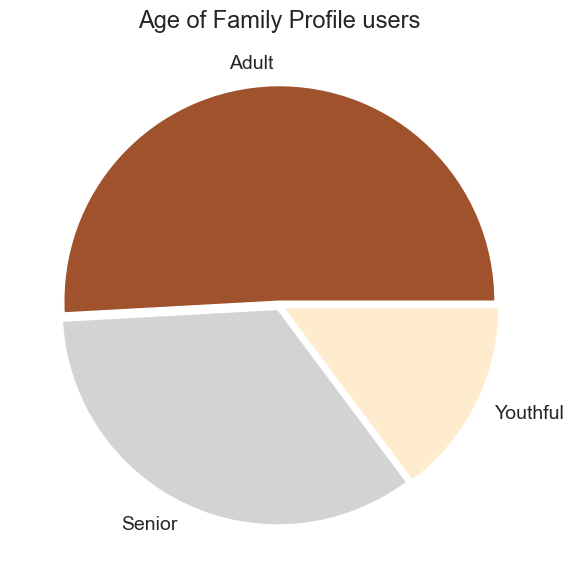

In [107]:
pie_fam_age=plt.pie(df_fam_age['count'],
                     explode=pie_chart_exploded,
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=df_fam_age['age_category'],
                     textprops={'fontsize': 14})

plt.title('Age of Family Profile users', fontsize=17)

In [108]:
# Analysing the distribution of orders by income within the family profile

df_fam_income=df_fam[['income_brackets']].value_counts().reset_index(name='count')
df_fam_income

,income_brackets,count
0,Regular income,5278618
1,Lower income,1874227
2,High income,58216


Text(0.5, 1.0, 'Income of Family Profile users')

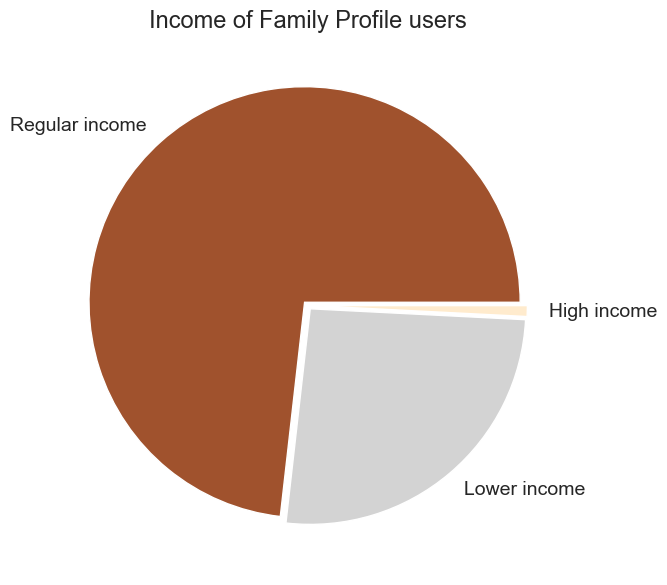

In [109]:
pie_fam_age=plt.pie(df_fam_income['count'],
                     explode=pie_chart_exploded,
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=df_fam_income['income_brackets'],
                     textprops={'fontsize': 14})

plt.title('Income of Family Profile users', fontsize=17)

In [110]:
# Analysing the distribution of orders by weekday engagement within the family profile

df_fam_weekday=df_fam[['weekday_engagement']].value_counts().reset_index(name='count')
df_fam_weekday

,weekday_engagement,count
0,Active on weekdays,3760728
1,Active on weekends,3450333


Text(0.5, 1.0, 'Weekday engagement of Family Profile users')

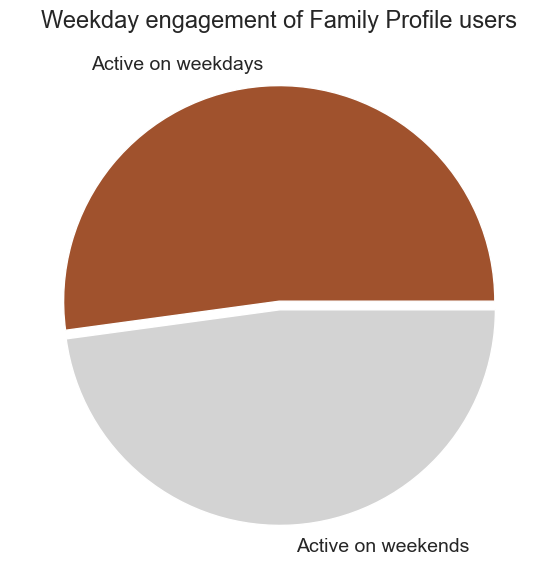

In [111]:
pie_fam_weekday=plt.pie(df_fam_weekday['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_fam_weekday['weekday_engagement'], 
                        textprops={'fontsize': 14})

plt.title('Weekday engagement of Family Profile users', fontsize=17)

In [112]:
# Analysing the distribution of orders by time of day engagement within the family profile

df_fam_hour=df_fam['time_day_engagement'].value_counts().reset_index(name='count')
df_fam_hour

,index,count
0,During business hours,5996099
1,Beyond business hours,1214962


Text(0.5, 1.0, 'Time of day engagement of Family Profile users')

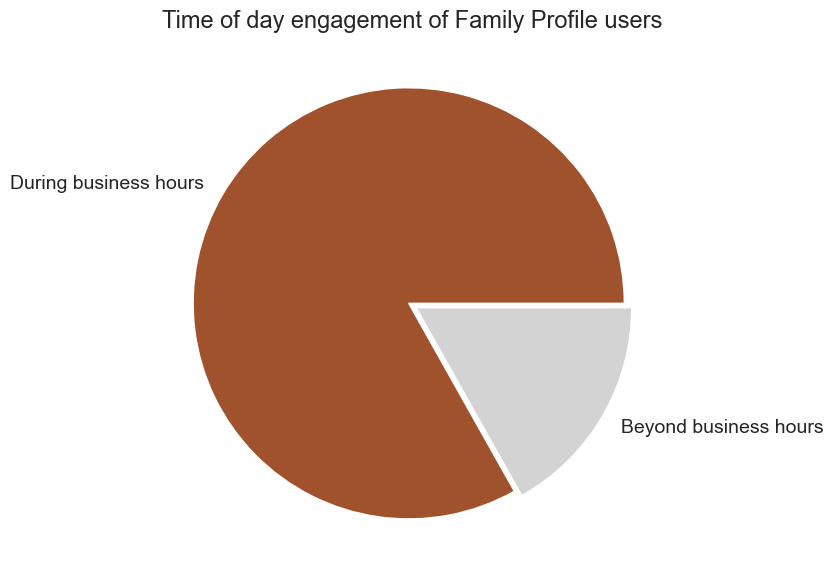

In [113]:
pie_fam_hour=plt.pie(df_fam_hour['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_fam_hour['index'], 
                        textprops={'fontsize': 14})

plt.title('Time of day engagement of Family Profile users', fontsize=17)

#### 4. Single parent 

In [114]:
# Analysing the distribution of orders by age within the single parent profile

df_single_age=df_single[['age_category']].value_counts().reset_index(name='count')
df_single_age

,age_category,count
0,Youthful,1481172


Text(0.5, 1.0, 'Age of Single Parent Profile users')

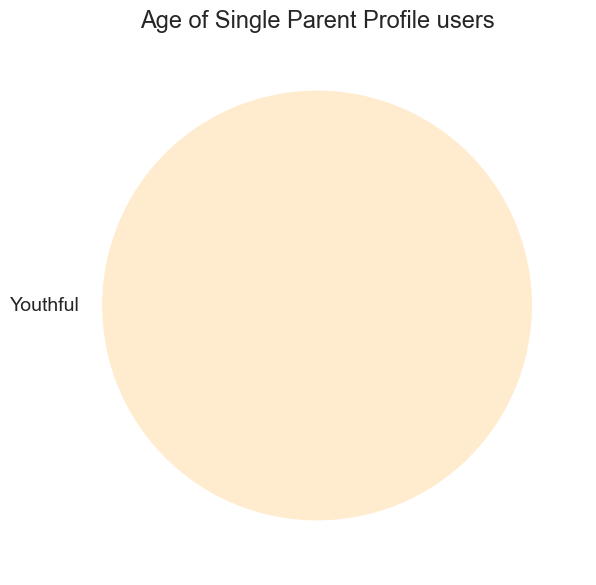

In [115]:
pie_single_age=plt.pie(df_single_age['count'],
                     colors=['blanchedalmond'],
                     labels=df_single_age['age_category'],
                     textprops={'fontsize': 14})

plt.title('Age of Single Parent Profile users', fontsize=17)

In [116]:
# Analysing the distribution of orders by income within the single parent profile

df_single_income=df_single[['income_brackets']].value_counts().reset_index(name='count')
df_single_income

,income_brackets,count
0,Lower income,741380
1,Regular income,735734
2,High income,4058


Text(0.5, 1.0, 'Income of Single Parent Profile users')

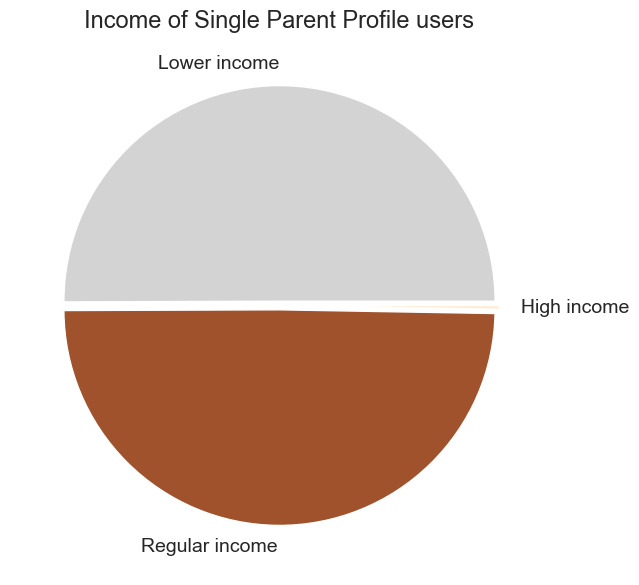

In [117]:
pie_single_income=plt.pie(df_single_income['count'],
                     explode=(0.02,0.02,0.02),
                     colors=['lightgrey','sienna','blanchedalmond'],
                     labels=df_single_income['income_brackets'],
                     textprops={'fontsize': 14})

plt.title('Income of Single Parent Profile users', fontsize=17)

In [118]:
# Analysing the distribution of orders by weekday engagement within the family profile

df_single_weekday=df_single[['weekday_engagement']].value_counts().reset_index(name='count')
df_single_weekday

,weekday_engagement,count
0,Active on weekdays,782248
1,Active on weekends,698924


Text(0.5, 1.0, 'Weekday engagement of Single Parent Profile users')

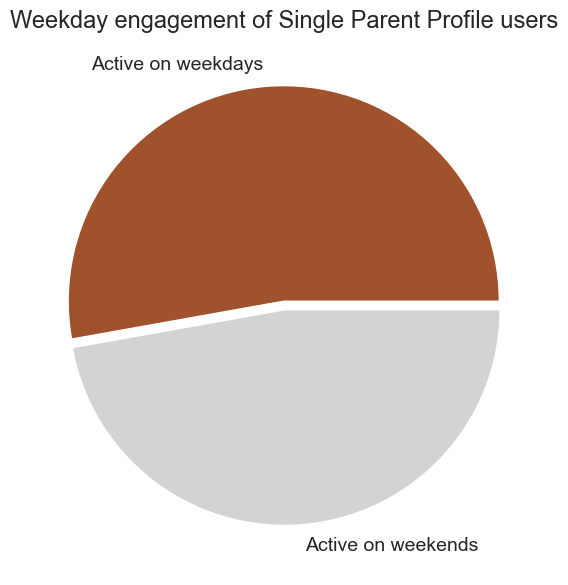

In [119]:
pie_single_weekday=plt.pie(df_single_weekday['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_single_weekday['weekday_engagement'], 
                        textprops={'fontsize': 14})

plt.title('Weekday engagement of Single Parent Profile users', fontsize=17)

In [120]:
# Analysing the distribution of orders by time of day engagement within the family profile

df_single_hour=df_single['time_day_engagement'].value_counts().reset_index(name='count')
df_single_hour

,index,count
0,During business hours,1218962
1,Beyond business hours,262210


Text(0.5, 1.0, 'Time of day engagement of Single Parent Profile users')

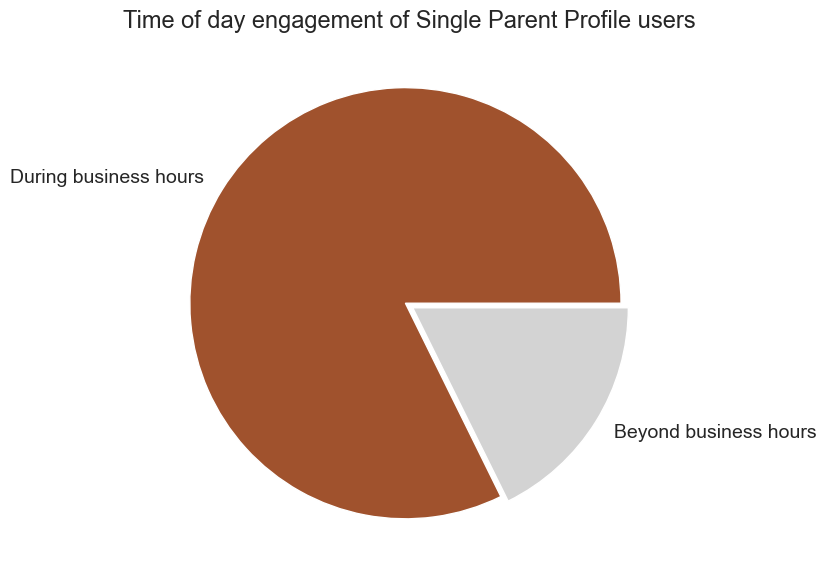

In [121]:
pie_single_hour=plt.pie(df_single_hour['count'],
                        explode=(0.02,0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=df_single_hour['index'], 
                        textprops={'fontsize': 14})

plt.title('Time of day engagement of Single Parent Profile users', fontsize=17)

### Analysing customer behavior

    usage frequency
    expenditure
    regions
    product popularity

[Back to top](#top)

#### Statistical analysis of usage frequency and expenditure

In [122]:
# Aggregating max, mean, and min variables on a customer-profile level for usage frequency and expenditure

stats_profile=df_final.groupby(['profile','gender'])['days_since_prior_order','prices'].agg(['min','max','mean'])
stats_profile.to_clipboard()
stats_profile

C:\Users\frauz\AppData\Local\Temp\ipykernel_10924\1227009425.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats_profile=df_final.groupby(['profile','gender'])['days_since_prior_order','prices'].agg(['min','max','mean'])


days_since_prior_order                  prices  \
                                               min   max       mean    min   
profile              gender                                                  
Big family           Female                    0.0  30.0  10.825593    1.0   
                     Male                      0.0  30.0  10.822341    1.0   
Family               Female                    0.0  30.0  10.782956    1.0   
                     Male                      0.0  30.0  10.845666    1.0   
One-person household Female                    0.0  30.0  10.753843    1.0   
                     Male                      0.0  30.0  10.829862    1.0   
Single parent        Female                    0.0  30.0  10.754656    1.0   
                     Male                      0.0  30.0  10.747496    1.0   

                                             
                              max      mean  
profile              gender                  
Big family           Female  25.0  7.782591  
                     Male    25.0  7.791736  
Family               Female  25.0  7.792929  
                     Male    25.0  7.797356  
One-person household Female  25.0  7.791859  
                     Male    25.0  7.786446  
Single parent        Female  25.0  7.792075  
                     Male    25.0  7.808029

#### Due to the unnaturally even distribution of data in the user dataset, we hardly see any difference between the minimum, maximum, and average usage frequency and expenditure across all profiles. Please review 'Overview of User Data Concerns.xlsx' for more details on my concerns regarding the data.

#### Customer behavior by region

In [123]:
df_final.columns.to_list()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'user_id',
 'order_number',
 'order_day_of_the_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_name',
 'department_id',
 'prices',
 'price_range',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'spending_range',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'week',
 'region',
 'department_name',
 'profile',
 'age_category',
 'income_brackets',
 'mode_day',
 'weekday_engagement',
 'mode_hour',
 'time_day_engagement']

In [124]:
# Aggregaring the order count by profile, region and age

df_prof_reg=df_final.groupby('profile')[['region','loyalty_flag']].value_counts().reset_index(name='count')

df_prof_reg

,profile,region,loyalty_flag,count
0,Big family,South,Regular customer,2499230
1,Big family,West,Regular customer,1906719
2,Big family,Midwest,Regular customer,1751333
3,Big family,South,Loyal customer,1612259
4,Big family,Northeast,Regular customer,1313932
5,Big family,West,Loyal customer,1261978
6,Big family,Midwest,Loyal customer,1081401
7,Big family,Northeast,Loyal customer,861289
8,Big family,South,New customer,743350
9,Big family,West,New customer,577295


C:\Users\frauz\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Comparing profiles by loyalty level across regions')

<Figure size 1600x700 with 0 Axes>

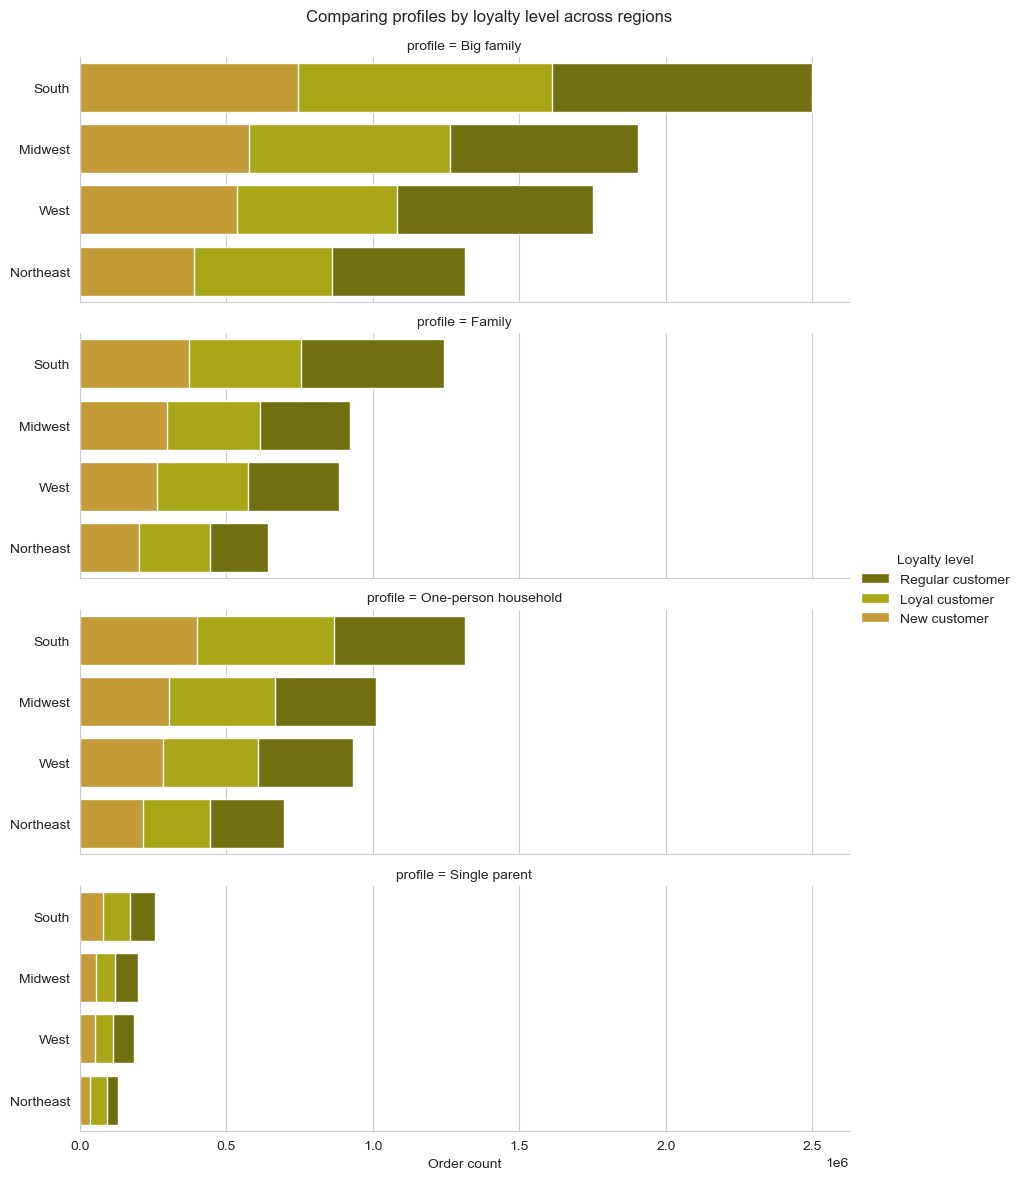

In [125]:
plt.figure(figsize=(16,7))
d={'color':['olive','y', 'goldenrod']}
grid=sns.FacetGrid(df_prof_reg,
                   row='profile',
                   hue='loyalty_flag',
                   height=3,
                   aspect=3,
                  hue_kws=d)
plot=grid.map(sns.barplot, 'count', 'region')
grid.add_legend(title='Loyalty level')
plt.ylabel('')
grid.fig.subplots_adjust(top=0.94)
grid.set_axis_labels('Order count','')
grid.fig.suptitle('Comparing profiles by loyalty level across regions')


In [126]:
grid.savefig(os.path.join(path1,'Visualizations','Order count by profile and loyalty status across regions.png'))

#### Department populaity across profiles

In [127]:
# Aggregaring the order count by profile and department

df_prof_dep=df_final.groupby('profile')[['department_name']].value_counts().sort_values(ascending=False).reset_index(name='count')
df_prof_dep

,profile,department_name,count
0,Big family,produce,4262296
1,Big family,dairy eggs,2421459
2,One-person household,produce,2275441
3,Family,produce,2110997
4,Big family,snacks,1301249
...,...,...,...
79,One-person household,bulk,8000
80,Single parent,pets,5338
81,Single parent,missing,3317
82,Single parent,other,1815


C:\Users\frauz\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


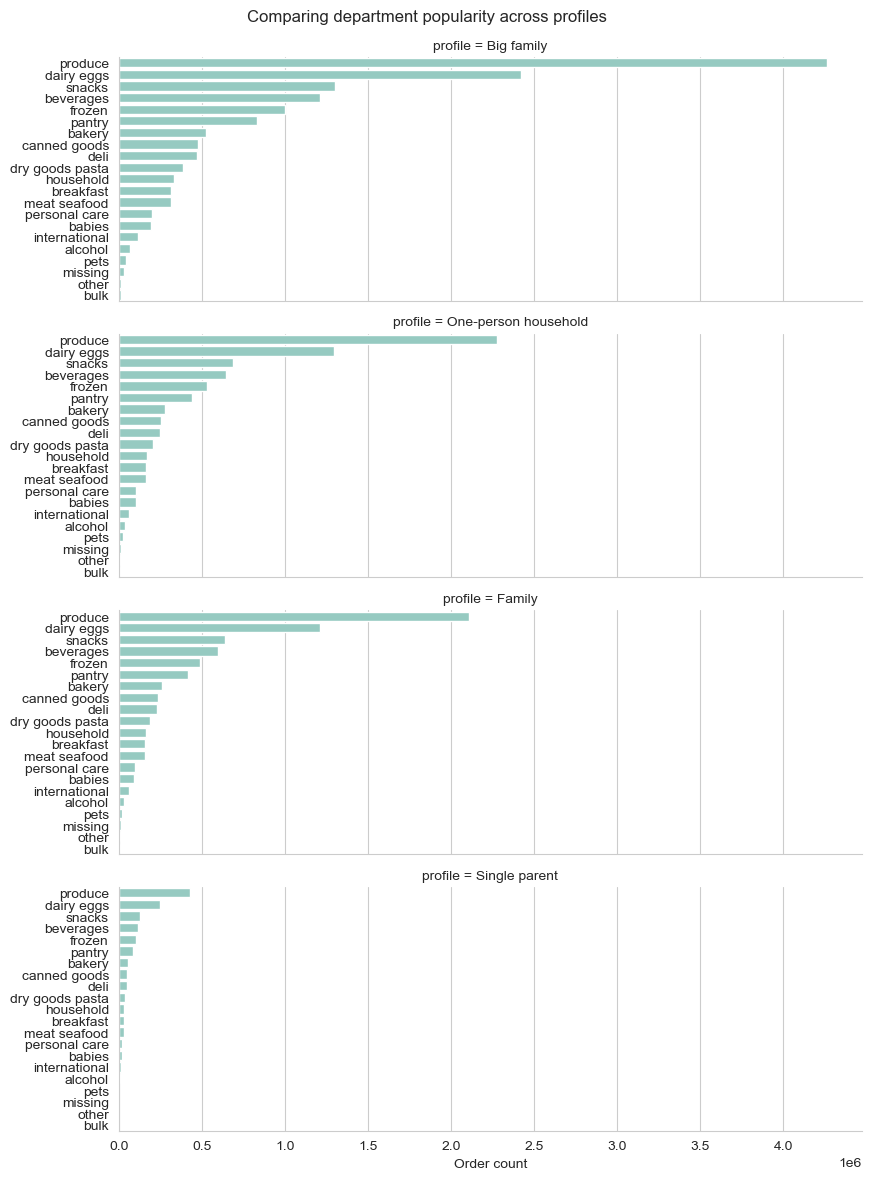

In [128]:
sns.set_palette('Set3')
grid_dep=sns.FacetGrid(df_prof_dep,
                   row='profile',
                   height=3,
                   aspect=3)
plot=grid_dep.map(sns.barplot, 'count', 'department_name')
grid_dep.fig.subplots_adjust(top=0.94)
grid_dep.fig.suptitle('Comparing department popularity across profiles')
grid_dep.set_axis_labels("Order count", "")

In [129]:
grid_dep.savefig(os.path.join(path1,'Visualizations','Department popularity by profile.png'))

#### Again, the distribution of data among different groups of users seems to follow an unnaturally similar pattern (see 'Overview of User Data Concerns.xlsx' for more details.  

In [130]:
# Grouping and aggregaring price values to compare everage product price across regions and family status

df_price_reg=df_final.groupby(['region','profile'])['prices'].mean().sort_values(ascending=False).rename_axis(['region','profile']).reset_index(name='avg_price')
df_price_reg['avg_price']=round(df_price_reg['avg_price'],2)
df_price_reg

,region,profile,avg_price
0,Midwest,Single parent,7.82
1,West,Single parent,7.81
2,South,Single parent,7.81
3,South,Family,7.80
4,West,Family,7.80
5,South,One-person household,7.79
6,Midwest,One-person household,7.79
7,Midwest,Family,7.79
8,West,Big family,7.79
9,Midwest,Big family,7.79


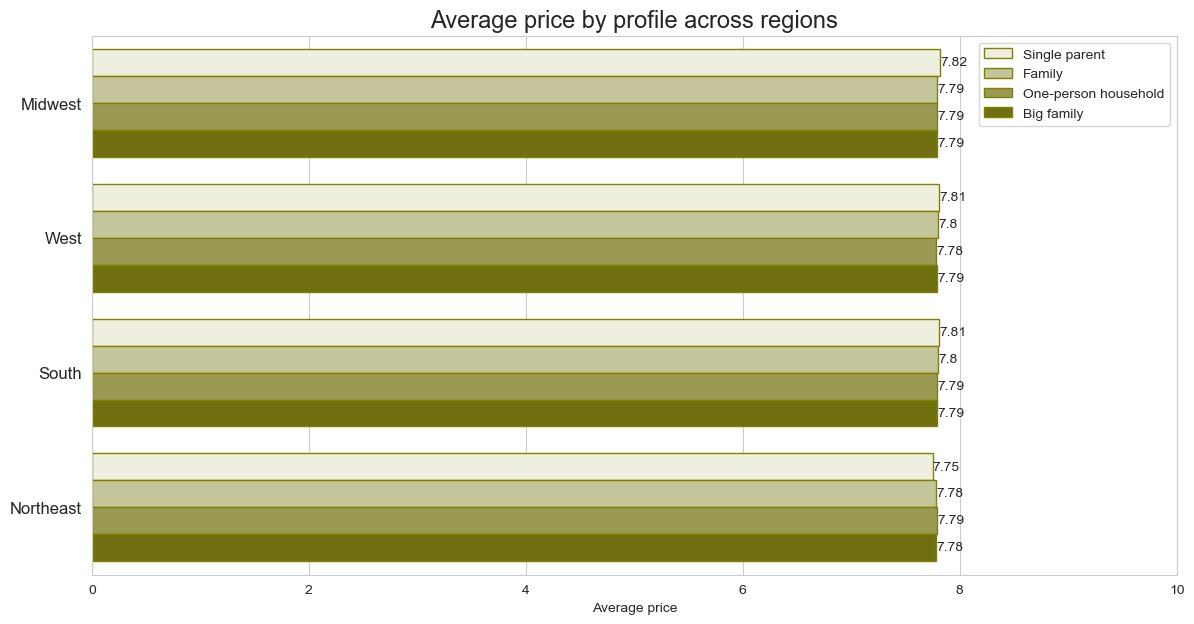

In [131]:
# Plotting average product price across regions and family status

reg_plot_price=sns.barplot(y='region', x='avg_price', data=df_price_reg, color='olive', edgecolor='olive', hue='profile')
plt.yticks(fontsize=12)
plt.xlabel('Average price')
plt.title('Average price by profile across regions', fontsize=17)
plt.ylabel('')
plt.legend(title='', loc=0)
plt.xlim(0,10)

for i in reg_plot_price.containers:
    reg_plot_price.bar_label(i,)

In [132]:
reg_plot_price.figure.savefig(os.path.join(path1,'Visualizations','Average price by profile across regions.png'))

In [133]:
# Exporting the final dataframe as pickle

df_final.to_pickle(os.path.join(path, 'Prepared Data', 'final_analysis_data.pkl'))